In [1]:
import json
import urllib.request
import numpy as np
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
product_df = pd.read_pickle('E:\entrevistas\dataset\products_final2.pkl')

In [17]:
from datetime import datetime
from dateutil.relativedelta import relativedelta


def date(row):
    
    if row['discount'] == 0:
        row['has_discount'] = False
    else:
        row['has_discount'] = True
    
    
    s_registration_timestamp = pd.Timestamp(row['seller_registration_date']).tz_convert(None)
    row['seller_registration_year'] = s_registration_timestamp.year
    row['seller_registration_month'] = s_registration_timestamp.month
    row['seller_registration_day'] = s_registration_timestamp.month
    
    now = datetime.now()
    end_date = datetime.fromtimestamp(datetime.now().timestamp())
    try:
        #if timestamp is none
        start_date = datetime.fromtimestamp(s_registration_timestamp.timestamp())
        
        difference_in_years = relativedelta(end_date, start_date).years
        difference_in_months = relativedelta(end_date, start_date).months
        #difference_in_days = relativedelta(end_date, start_date).days

        month_diff = difference_in_years * 12 + difference_in_months

        row['seller_years_active'] = difference_in_years
        row['seller_months_active'] = month_diff

        time_diff = now - s_registration_timestamp
        row['seller_days_active'] = time_diff.days
    
    except:
        #all nan
        row['seller_years_active'] = s_registration_timestamp.year
        row['seller_months_active'] = s_registration_timestamp.year
        row['seller_days_active'] = s_registration_timestamp.year
        
        
    
    
    
    item_pub_startt = pd.Timestamp(row['publication_start_time']).tz_convert(None)
    row['item_publication_year'] = item_pub_startt.year
    row['item_publication_month'] = item_pub_startt.month
    row['item_publication_day'] = item_pub_startt.month

    try:
        #if timestamp is none
        start_date = datetime.fromtimestamp(item_pub_startt.timestamp())

        difference_in_years = relativedelta(end_date, start_date).years
        difference_in_months = relativedelta(end_date, start_date).months
        #difference_in_days = relativedelta(end_date, start_date).days

        month_diff = difference_in_years * 12 + difference_in_months

        row['item_years_published'] = difference_in_years
        row['item_months_published'] = month_diff

        time_diff = now - item_pub_startt
        row['item_days_published'] = time_diff.days

    except:
        #all nan
        row['item_years_published'] = item_pub_startt.year
        row['item_months_published'] = item_pub_startt.year
        row['item_days_published'] = item_pub_startt.year
    
    return row
    
product_df = product_df.apply(date, axis=1)

In [4]:
product_df.category.value_counts()

Ropa y Accesorios                43040
Deportes y Fitness               40967
Hogar, Muebles y Jardín          24984
Accesorios para Vehículos        19785
Joyas y Relojes                  17842
Computación                      17544
Bebés                            16380
Electrónica, Audio y Video       15253
Belleza y Cuidado Personal       14631
Autos, Motos y Otros             12643
Cámaras y Accesorios             11366
Celulares y Teléfonos            10875
Herramientas y Construcción      10043
Animales y Mascotas               9098
Electrodomésticos y Aires Ac.     8376
Antigüedades y Colecciones        8000
Agro                              6091
Consolas y Videojuegos            5634
Arte, Librería y Mercería         5169
Alimentos y Bebidas               5000
Name: category, dtype: int64

# **Discounts Analysis**

## Cantidad de Items con y sin Descuento

In [326]:
some_df = pd.DataFrame(product_df.groupby(['category'])['has_discount'].value_counts())
some_df.columns = ['count']
some_df = some_df.reset_index()

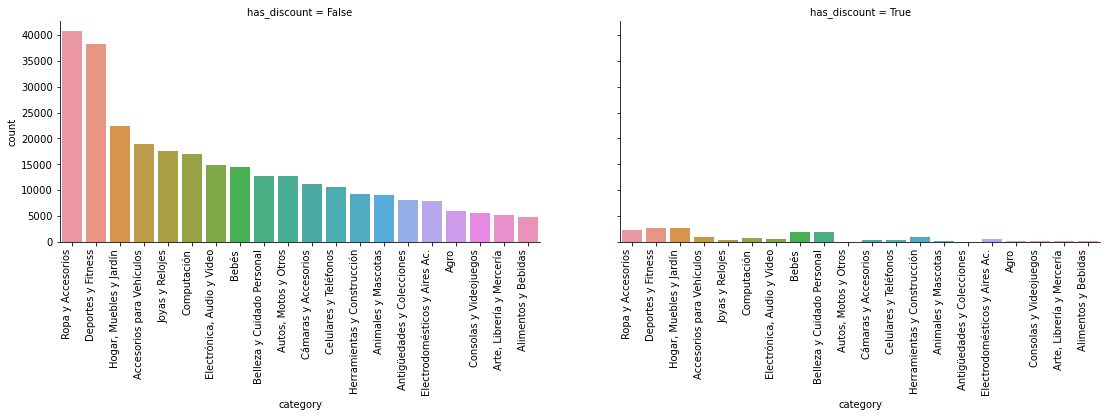

In [333]:

#los productos con descuento claramente venden mas que aquellos sin descuento
chart = sns.catplot(x="category", y="count",
            col="has_discount", 
            kind="bar", 
            data=some_df.sort_values(by='count', ascending=False),
           height=4, aspect = 2)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

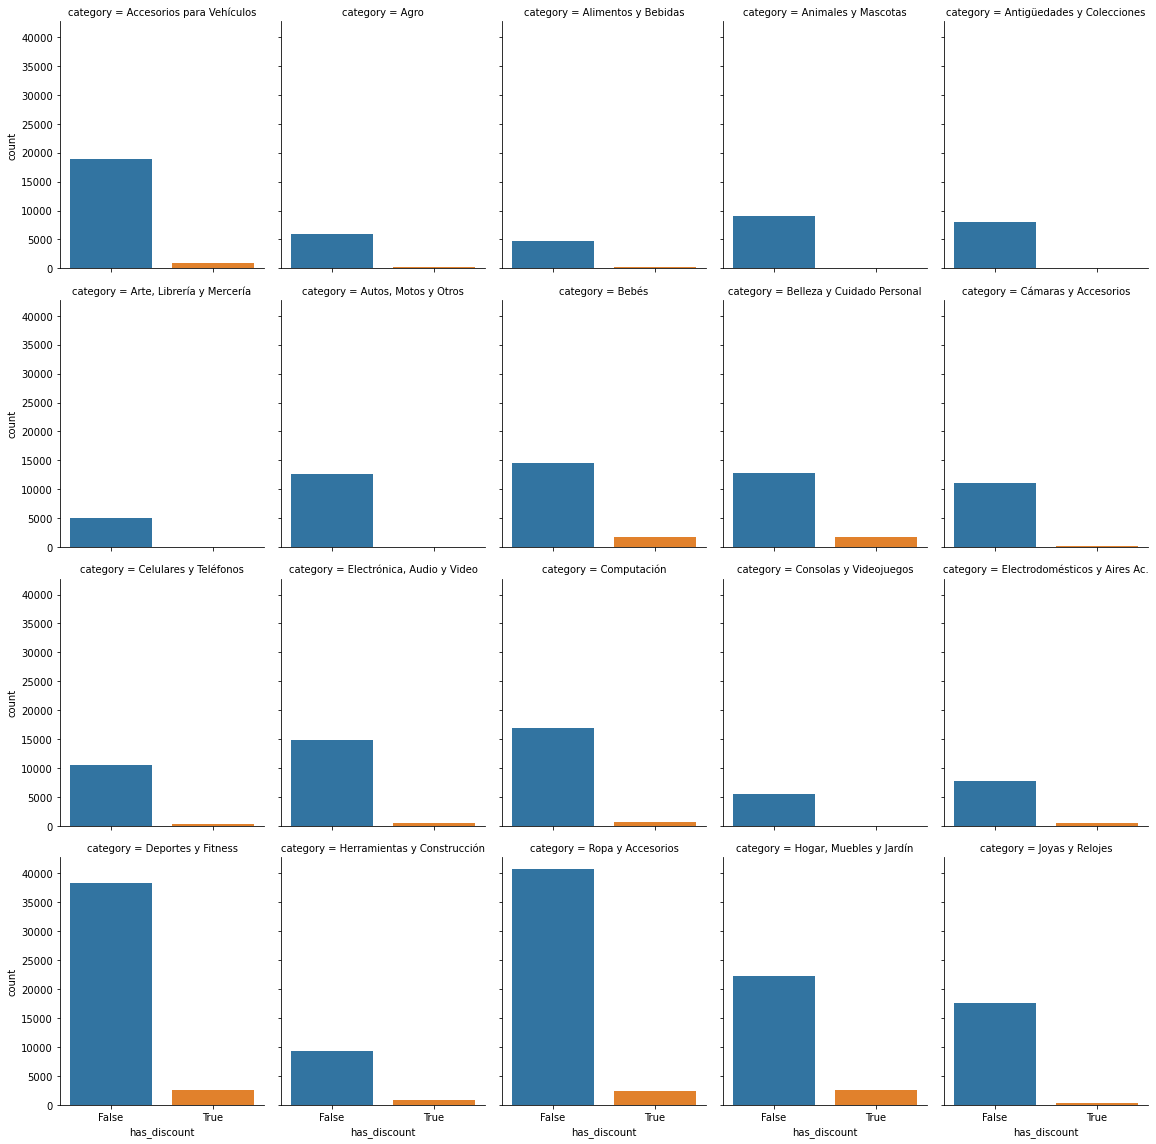

In [60]:
g = sns.catplot("has_discount", col="category", col_wrap=5,
                data=product_df[product_df.category.notnull()],
                kind="count", height=4, aspect=.8)

## Categoria con mayor cantidad de items con descuento

In [65]:
discount_df = product_df[product_df['has_discount'] == True]

In [6]:
#discount sample distribution
discount_df.category.value_counts()

Deportes y Fitness               2658
Hogar, Muebles y Jardín          2654
Ropa y Accesorios                2316
Bebés                            1849
Belleza y Cuidado Personal       1837
Accesorios para Vehículos         955
Herramientas y Construcción       809
Computación                       631
Electrodomésticos y Aires Ac.     584
Electrónica, Audio y Video        468
Celulares y Teléfonos             387
Joyas y Relojes                   320
Cámaras y Accesorios              269
Alimentos y Bebidas               216
Agro                              180
Arte, Librería y Mercería          51
Consolas y Videojuegos             50
Animales y Mascotas                45
Antigüedades y Colecciones         13
Name: category, dtype: int64

In [66]:
discounted_products_df = pd.DataFrame(data=discount_df.category.value_counts()).reset_index()

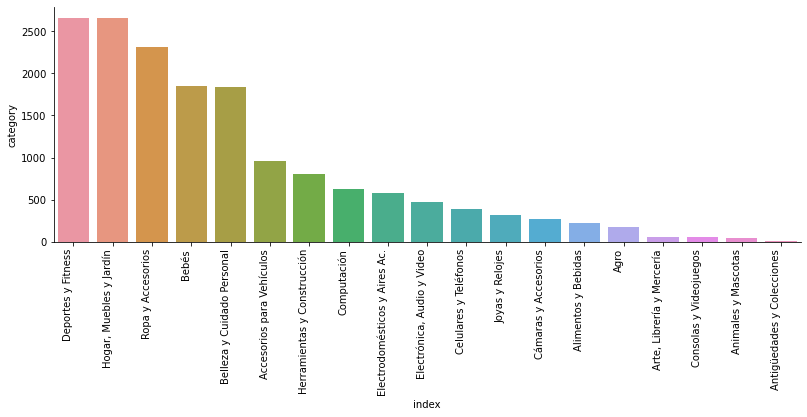

In [88]:
chart = sns.catplot(x="index", y="category", kind="bar", data=discounted_products_df, height=4, aspect = 3)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

## Descuento promedio por sub_categoria

In [68]:
#descuento medio por subcategoria
discount_df.groupby(['sub_category'])['discount'].mean().sort_values(ascending=False)[:50]

sub_category
Pisos y Revestimientos            0.352026
Organización para el Hogar        0.346852
Trajes                            0.332475
Proyectores y Pantallas           0.316147
Trajes de Baño                    0.311847
Telefonía IP                      0.310950
Polleras                          0.294413
Bermudas y Shorts                 0.285716
Tablets y Accesorios              0.285637
Ciclismo                          0.281713
Navegadores GPS                   0.279440
Drones y Accesorios               0.278437
Handies y Radiofrecuencia         0.275783
Camperas, Tapados y Trenchs       0.274592
Laptops y Accesorios              0.273050
Almacenamiento                    0.270055
Equipaje, Bolsos y Carteras       0.267388
Monitores y Accesorios            0.266004
Adornos y Decoración del Hogar    0.265828
Webcams y Audio para PC           0.263081
Camisas                           0.262999
Maquillaje                        0.262048
Acc. para Motos y Cuatriciclos    0.25987

In [71]:
mean_discount_df = pd.DataFrame(data=discount_df.groupby(['sub_category'])['discount'].mean().sort_values(ascending=False)[:50]).reset_index()

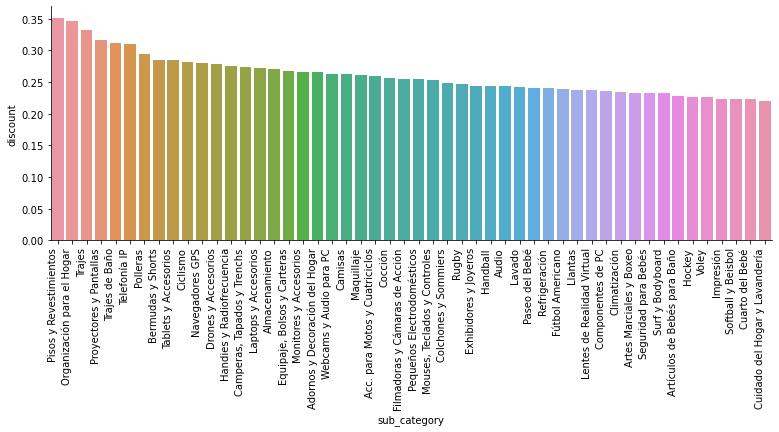

In [74]:
chart = sns.catplot(x="sub_category", y="discount", kind="bar", data=mean_discount_df, height=4, aspect = 3)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

## Cantidades disponibles del item para los segmeentos de con y sin descuento

In [8]:
mean_q = product_df.groupby(['sub_category', 'has_discount'], as_index=False).mean()

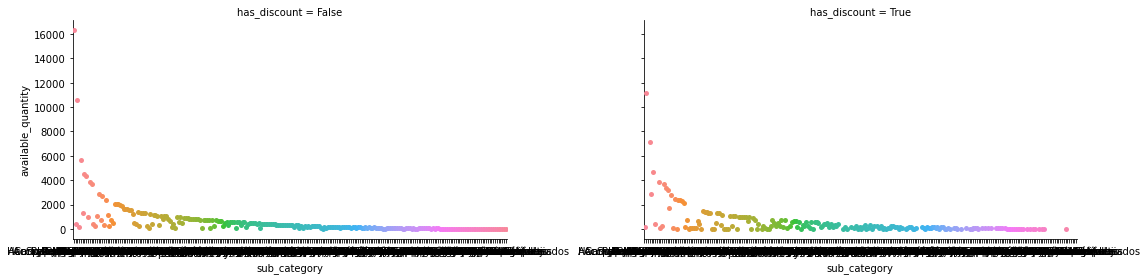

In [87]:
sns.catplot(x="sub_category", y="available_quantity",
                col="has_discount", data=mean_q[['sub_category', 'has_discount', 'available_quantity']].sort_values(by='available_quantity', ascending=False), 
            height=4, aspect = 2)

**no parece que los descuentos respondan a una razon de exceso de stock**

## Cantidad Vendida

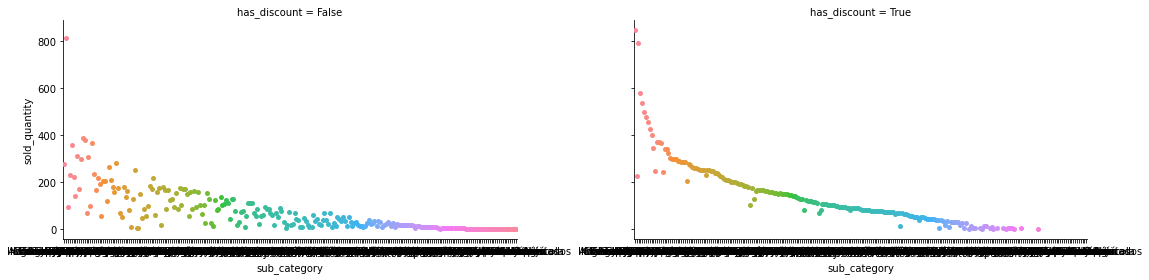

In [10]:
sns.catplot(x="sub_category", y="sold_quantity",
            col="has_discount", 
            data=mean_q[['sub_category', 'has_discount', 'sold_quantity']].sort_values(by='sold_quantity', ascending=False),
           height=4, aspect = 2)

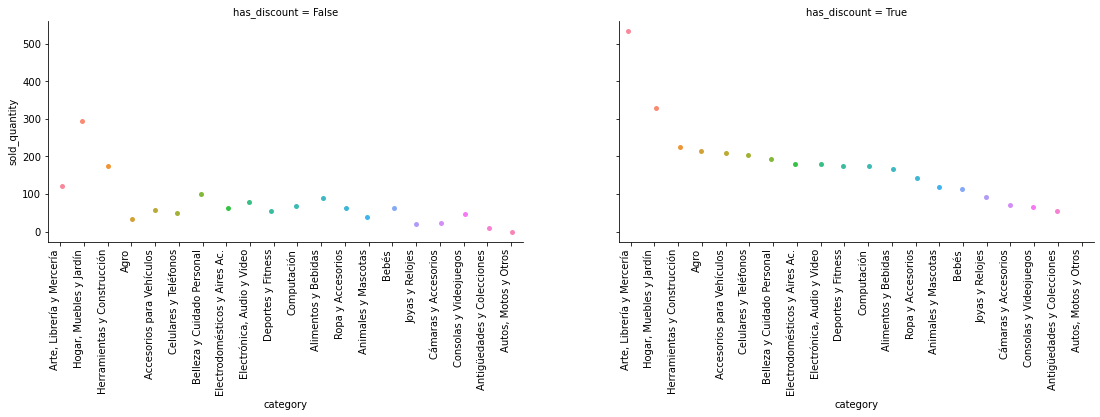

In [11]:
mean_q_cat = product_df.groupby(['category', 'has_discount'], as_index=False).mean()

chart = sns.catplot(x="category", y="sold_quantity",
                col="has_discount", 
                data=mean_q_cat[['category', 'has_discount', 'sold_quantity']].sort_values(by='sold_quantity', ascending=False),
                height=4, aspect = 2)

chart.set_xticklabels(rotation=90, horizontalalignment='right')

**los productos con descuento claramente venden mas que aquellos sin descuento**

## Distribucion Geografica de los descuentos

In [12]:
#los que tienen discount 0 no aparecen porque el size que le asigna es 0, entonces agrego un  offset.
def scaled_discount(row):
    row['scaled_discount'] = row['discount'] + 0.001
    
    return row

product_df = product_df.apply(scaled_discount, axis=1)

(-60.0, -20.0)

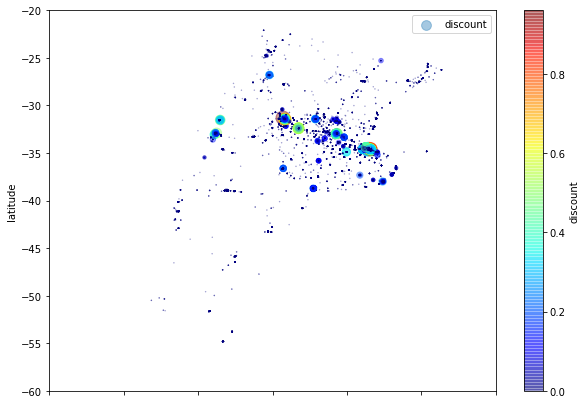

In [12]:
product_df.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.4, s=product_df['scaled_discount']*200, label='discount', 
              figsize=(10,7), c='discount', cmap=plt.get_cmap('jet'), colorbar=True,)

plt.xlim(-80, -50)
plt.ylim(-60, -20)

**los mayores descuentos parecen concentrarse ne los principales centros urbanos como capital federal, rosario, cordoba, mendoza**

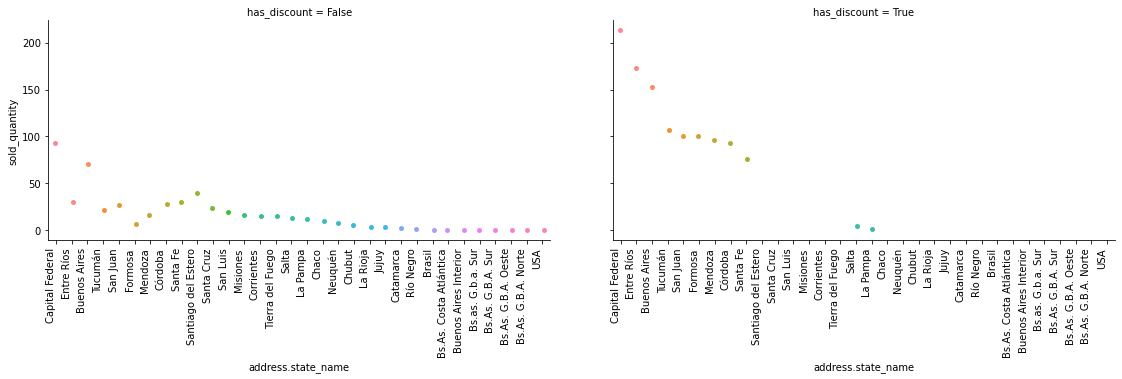

In [240]:
mean_q_prov = product_df.groupby(['address.state_name', 'has_discount'], as_index=False).mean()

chart = sns.catplot(x="address.state_name", y="sold_quantity",
                col="has_discount", 
                data=mean_q_prov[['address.state_name', 'has_discount', 'sold_quantity']].sort_values(by='sold_quantity', ascending=False),
                height=4, aspect = 2)

chart.set_xticklabels(rotation=90, horizontalalignment='right')

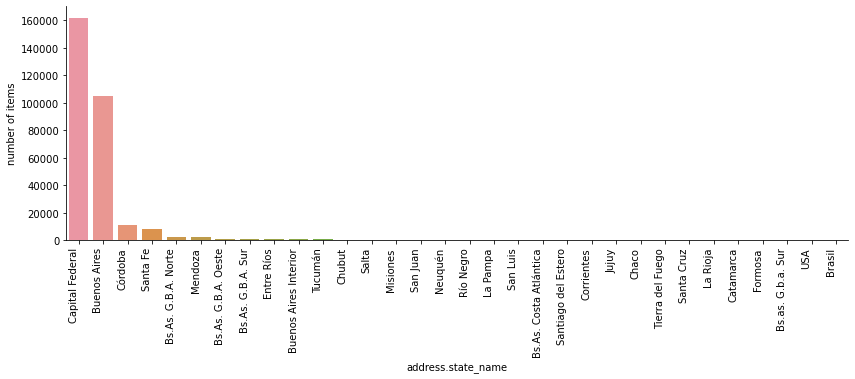

In [246]:
n_products_df = pd.DataFrame(data=product_df['address.state_name'].value_counts()).reset_index()
n_products_df = n_products_df.rename(columns={"index": "address.state_name", "address.state_name": "number of items"})
chart = sns.catplot(x="address.state_name", y="number of items", kind="bar", data=n_products_df, height=4, aspect = 3)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

# Categories Distribution

In [13]:
product_df.describe()

price  available_quantity  sold_quantity  \
count  3.027210e+05       302721.000000  302721.000000   
mean   1.001838e+05          576.482993      82.726355   
std    8.839007e+06         4618.303075     538.247657   
min    1.000000e-02            1.000000       0.000000   
25%    7.500000e+02            1.000000       1.000000   
50%    1.900000e+03            1.000000       5.000000   
75%    5.350000e+03           50.000000      50.000000   
max    2.983618e+09        50000.000000   50000.000000   

       seller.seller_reputation.transactions.total  \
count                                300657.000000   
mean                                  26306.536076   
std                                   66146.957640   
min                                       0.000000   
25%                                     453.000000   
50%                                    4259.000000   
75%                                   21248.000000   
max                                  641092.000000   

       seller.seller_reputation.transactions.canceled  \
count                                   300657.000000   
mean                                      1197.401135   
std                                       3149.675832   
min                                          0.000000   
25%                                         23.000000   
50%                                        182.000000   
75%                                        886.000000   
max                                      30728.000000   

       seller.seller_reputation.transactions.ratings.negative  \
count                                      300657.000000        
mean                                            0.014447        
std                                             0.064848        
min                                             0.000000        
25%                                             0.000000        
50%                                             0.010000        
75%                                             0.010000        
max                                             1.000000        

       seller.seller_reputation.transactions.ratings.positive  \
count                                      300657.000000        
mean                                            0.937198        
std                                             0.194413        
min                                             0.000000        
25%                                             0.970000        
50%                                             0.980000        
75%                                             0.990000        
max                                             1.000000        

       seller.seller_reputation.transactions.ratings.neutral  \
count                                      300657.000000       
mean                                            0.023709       
std                                             0.108316       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.010000       
75%                                             0.020000       
max                                             1.000000       

       seller.seller_reputation.transactions.completed  \
count                                    300657.000000   
mean                                      25109.134941   
std                                       63141.237703   
min                                           0.000000   
25%                                         426.000000   
50%                                        4041.000000   
75%                                       20292.000000   
max                                      610380.000000   

       seller.seller_reputation.metrics.claims.rate  ...  seller_years_active  \
count                                 300653.000000  ...        300783.000000   
mean                                       0.008170  ...

In [14]:
#la variabilidad de los atributos principales frente a la media es enorme, lo cual es de esperar debido 
#a la distinta naturaleza de cada una de las categorias de los productos, variando en precio, cantidades disponibles,
#cantidades vendidas

In [15]:
product_df.groupby(['sub_category'])['available_quantity'].mean().sort_values(ascending=False)[:50]

sub_category
Handies y Radiofrecuencia         15169.103000
Kitesurf                          10592.580000
Canoas, Kayaks e Inflables         5649.251000
Windsurf                           4324.893000
Repuestos de Celulares             3859.628000
Suplementos y Shakers              3738.110000
Componentes de PC                  3612.219000
Construcción                       2814.698699
Impresión                          2393.520000
Controles Remotos                  2390.213000
Acc. para Motos y Cuatriciclos     2381.798000
Repuestos Motos y Cuatriciclos     2018.398000
Laptops y Accesorios               1950.396000
Seguridad para el Hogar            1928.398000
Almacenamiento                     1801.786000
Iluminación para el Hogar          1687.898000
Librería                           1647.084000
Electricidad                       1561.782783
Higiene y Cuidado del Bebé         1475.072000
Seguridad Vehicular                1466.118000
Mouses, Teclados y Controles       1422.523158


## Available Quantity

In [31]:
avl_q_df = pd.DataFrame(data=product_df.groupby(['sub_category'])['available_quantity'].mean().sort_values(ascending=False)[:25]).reset_index()

In [27]:
avl_q_df.head(1)

sub_category  available_quantity
0  Handies y Radiofrecuencia           15169.103

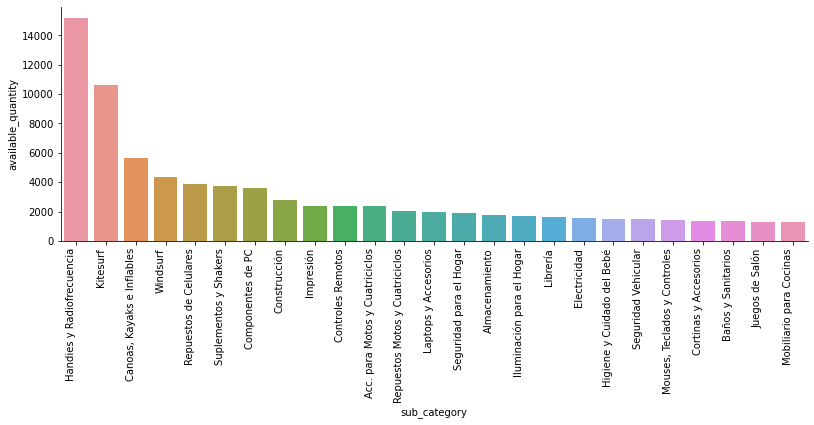

In [85]:
chart = sns.catplot(x="sub_category", y="available_quantity", kind="bar", data=avl_q_df, height=4, aspect = 3)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

## Price 

In [16]:
product_df.groupby(['sub_category'])['price'].mean().sort_values(ascending=False)[:50]

sub_category
Drones y Accesorios               4.153886e+06
Maquinaria Agrícola               3.382018e+06
Colectivos                        3.257063e+06
Camiones                          2.897608e+06
Autos y Camionetas                1.468760e+06
GNC                               1.397795e+06
Autos de Colección                1.222249e+06
Monitores y Accesorios            1.033921e+06
Esculturas                        9.102013e+05
Autos Chocados y Averiados        8.685323e+05
Semirremolques                    7.838030e+05
Motorhomes                        4.629467e+05
Maquinaria Vial                   3.810179e+05
Planes de Ahorro                  3.649359e+05
Náutica                           3.293602e+05
Motos                             2.451477e+05
Otros Vehículos                   2.381958e+05
Animales                          1.932800e+05
Alimentación y Suplementos        1.772804e+05
Generadores de Energía            1.752182e+05
Flippers y Arcade                 1.589340e+05


In [76]:
price_df = pd.DataFrame(data=product_df.groupby(['sub_category'])['price'].mean().sort_values(ascending=False)[0:50]).reset_index()

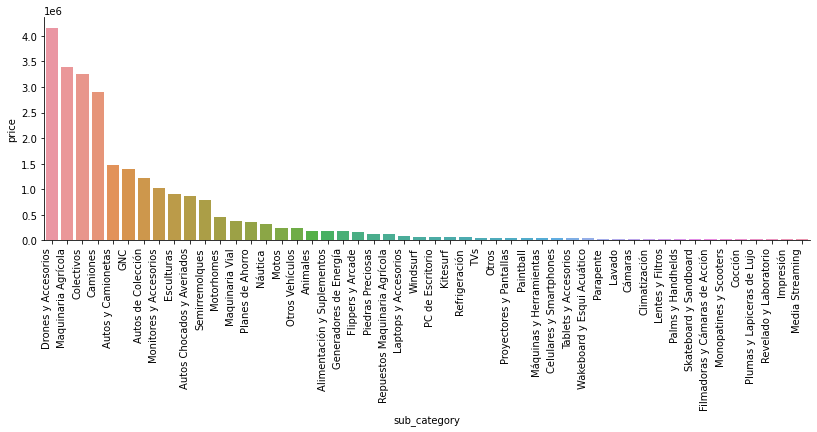

In [77]:
chart = sns.catplot(x="sub_category", y="price", kind="bar", data=price_df, height=4, aspect = 3)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

In [79]:
price_df = pd.DataFrame(data=product_df.groupby(['sub_category'])['price'].mean().sort_values(ascending=False)[:20]).reset_index()

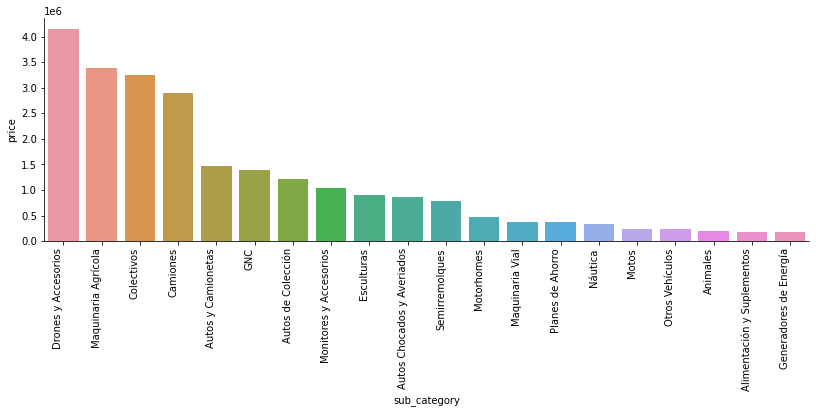

In [80]:
chart = sns.catplot(x="sub_category", y="price", kind="bar", data=price_df, height=4, aspect = 3)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

In [81]:
price_df = pd.DataFrame(data=product_df.groupby(['sub_category'])['price'].mean().sort_values(ascending=False)[20:50]).reset_index()

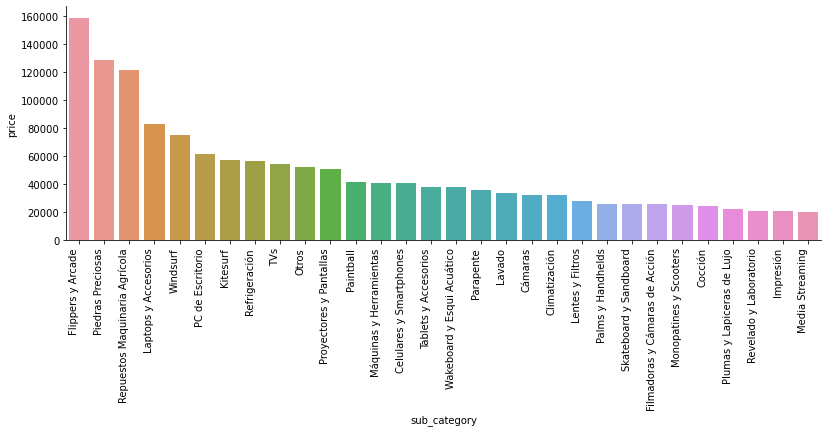

In [82]:
chart = sns.catplot(x="sub_category", y="price", kind="bar", data=price_df, height=4, aspect = 3)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

## Sold Quantity

In [17]:
product_df.groupby(['sub_category'])['sold_quantity'].mean().sort_values(ascending=False)[:50]

sub_category
Cortinas y Accesorios             779.827000
Seguridad para el Hogar           383.721000
Iluminación para el Hogar         381.450000
Pisos y Revestimientos            372.822823
Jardines y Exteriores             356.810000
Impresión                         326.099000
Adornos y Decoración del Hogar    313.605000
Bazar y Cocina                    307.825000
Librería                          286.810000
Comestibles                       273.725000
Fitness y Musculación             270.019000
Textiles de Hogar y Decoración    268.297000
Suplementos y Shakers             254.058000
Muebles para el Hogar             253.133000
Construcción                      249.966967
Calzado                           231.300000
Cuidado del Cabello               224.170000
Acc. para Motos y Cuatriciclos    222.655000
Audio                             215.673000
Electricidad                      213.940941
Pinturería                        209.948000
Cuidado del Hogar y Lavandería    207.1951

In [83]:
sold_q_df = pd.DataFrame(data=product_df.groupby(['sub_category'])['sold_quantity'].mean().sort_values(ascending=False)[:50]).reset_index()

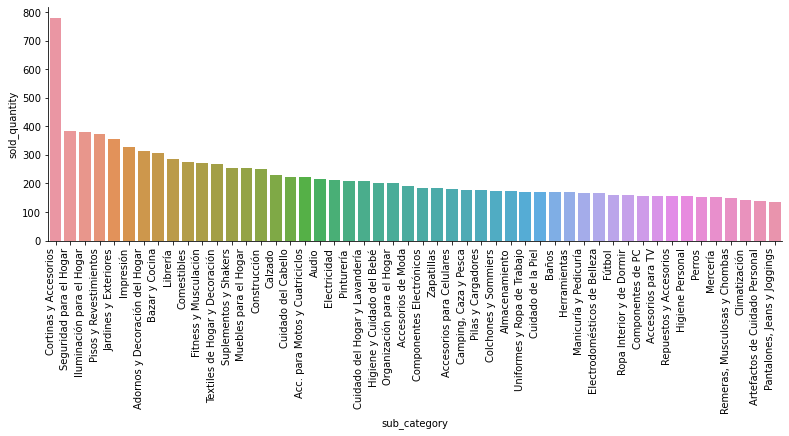

In [84]:
chart = sns.catplot(x="sub_category", y="sold_quantity", kind="bar", data=sold_q_df, height=4, aspect = 3)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

# Category: TVs

**Nos vamos a enfocar en la categoria de Televisores que es con la que vamos a resolver el problema de prediccion del Sold Quantity**

In [135]:
tv_df = pd.read_pickle(r'E:\entrevistas\dataset\tv_final.pkl')

In [96]:
tv_df.brand.value_counts().keys()[:17]

Index(['Philips', 'LG', 'Samsung', 'Sony', 'Noblex', 'Hitachi', 'Philco',
       'Sanyo', 'RCA', 'JVC', 'Admiral', 'Ken Brown', 'Top House', 'BGH',
       'TCL', 'Telefunken', 'Hisense'],
      dtype='object')

In [97]:
#brand_prices = tv_df.loc[tv_df['brand'].isin(tv_df.brand.value_counts().keys()[:17])]

In [136]:
from datetime import datetime
from dateutil.relativedelta import relativedelta


def date(row):
    s_registration_timestamp = pd.Timestamp(row['seller_registration_date']).tz_convert(None)
    row['seller_registration_year'] = s_registration_timestamp.year
    row['seller_registration_month'] = s_registration_timestamp.month
    row['seller_registration_day'] = s_registration_timestamp.month
    
    now = datetime.now()
    end_date = datetime.fromtimestamp(datetime.now().timestamp())
    try:
        #if timestamp is none
        start_date = datetime.fromtimestamp(s_registration_timestamp.timestamp())
        
        difference_in_years = relativedelta(end_date, start_date).years
        difference_in_months = relativedelta(end_date, start_date).months
        #difference_in_days = relativedelta(end_date, start_date).days

        month_diff = difference_in_years * 12 + difference_in_months

        row['seller_years_active'] = difference_in_years
        row['seller_months_active'] = month_diff

        time_diff = now - s_registration_timestamp
        row['seller_days_active'] = time_diff.days
    
    except:
        #all nan
        row['seller_years_active'] = s_registration_timestamp.year
        row['seller_months_active'] = s_registration_timestamp.year
        row['seller_days_active'] = s_registration_timestamp.year
        
        
    
    
    
    item_pub_startt = pd.Timestamp(row['publication_start_time']).tz_convert(None)
    row['item_publication_year'] = item_pub_startt.year
    row['item_publication_month'] = item_pub_startt.month
    row['item_publication_day'] = item_pub_startt.month

    try:
        #if timestamp is none
        start_date = datetime.fromtimestamp(item_pub_startt.timestamp())

        difference_in_years = relativedelta(end_date, start_date).years
        difference_in_months = relativedelta(end_date, start_date).months
        #difference_in_days = relativedelta(end_date, start_date).days

        month_diff = difference_in_years * 12 + difference_in_months

        row['item_years_published'] = difference_in_years
        row['item_months_published'] = month_diff

        time_diff = now - item_pub_startt
        row['item_days_published'] = time_diff.days

    except:
        #all nan
        row['item_years_published'] = item_pub_startt.year
        row['item_months_published'] = item_pub_startt.year
        row['item_days_published'] = item_pub_startt.year

    return row
    
tv_df = tv_df.apply(date, axis=1)

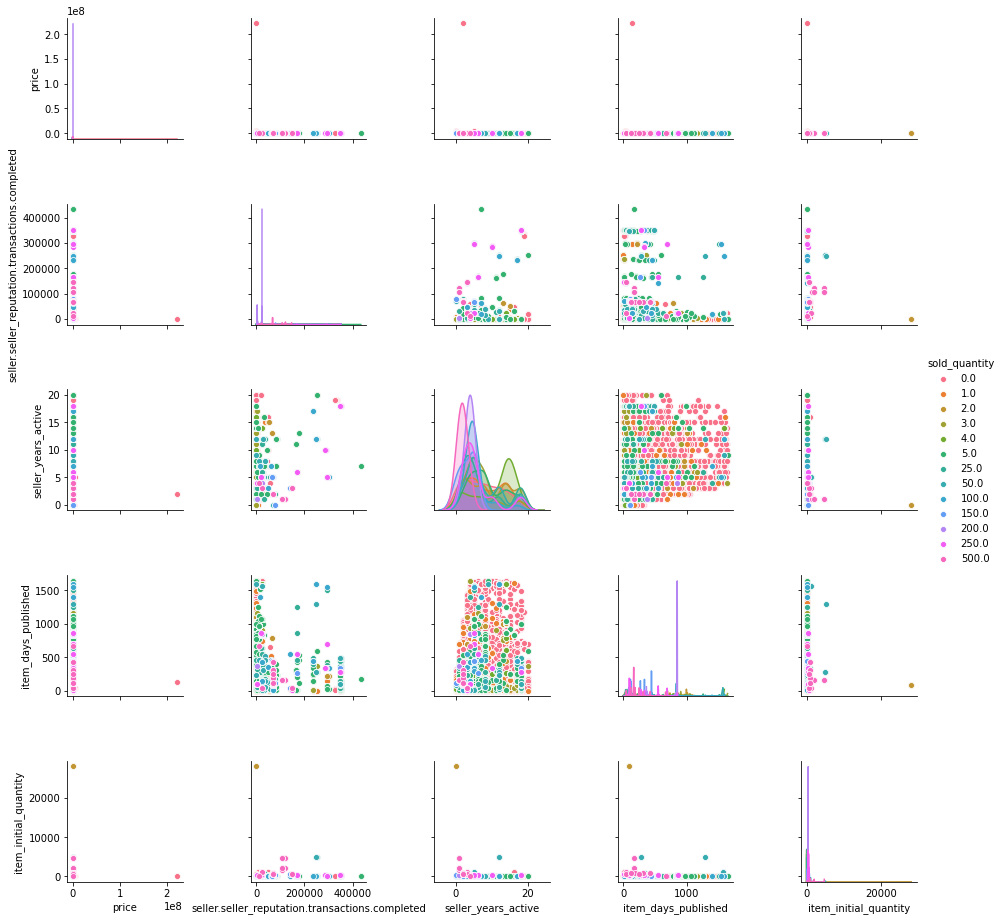

In [137]:
sns.pairplot(tv_df, vars=['price', 'seller.seller_reputation.transactions.completed', 'seller_years_active', 'item_days_published', 'item_initial_quantity'], 
             diag_kws={'bw':1.5}, hue="sold_quantity")

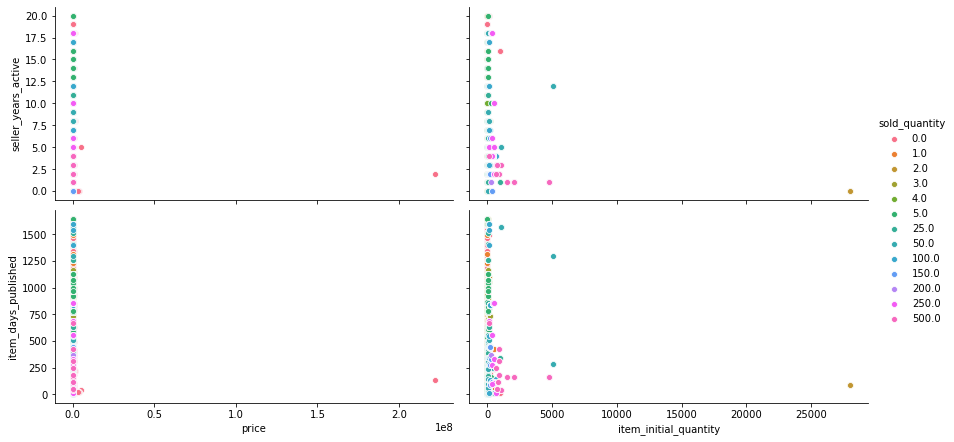

In [138]:
g = sns.pairplot(tv_df, 
                 x_vars=["price", "item_initial_quantity"],
                 y_vars=["seller_years_active", "item_days_published"], hue="sold_quantity",
                height=3, aspect = 2)

## Eliminamos Outliers

In [186]:
#eliminamos los outliers
tv_df = tv_df[(tv_df['price'] < 400000) & (tv_df['item_initial_quantity'] < 2000)]

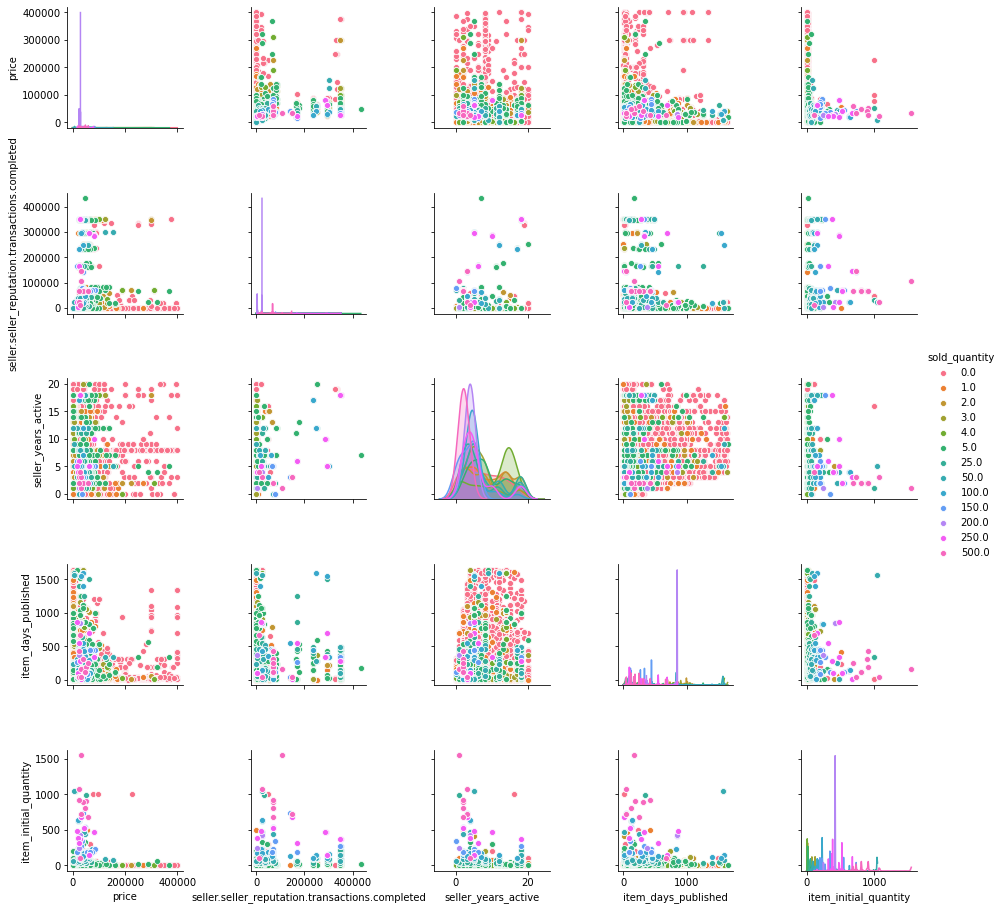

In [203]:
sns.pairplot(tv_df, vars=['price', 'seller.seller_reputation.transactions.completed', 'seller_years_active', 'item_days_published', 'item_initial_quantity'], 
             diag_kws={'bw':1.5}, hue="sold_quantity")

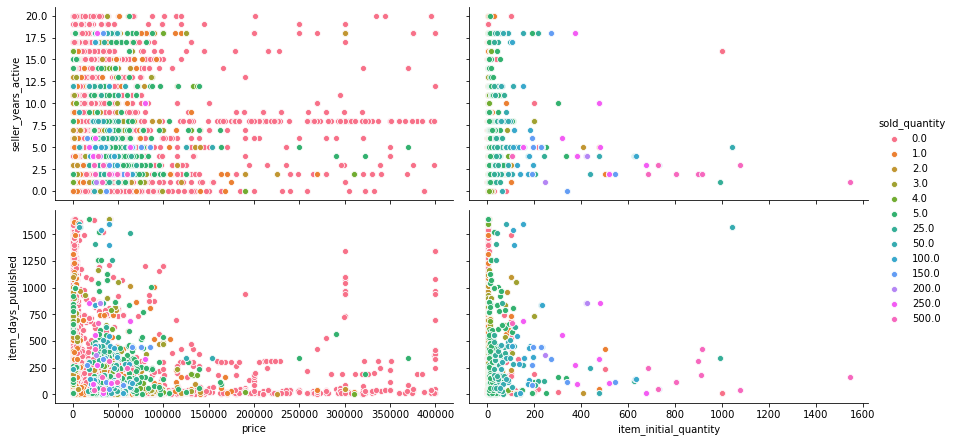

In [187]:
g = sns.pairplot(tv_df, 
                 x_vars=["price", "item_initial_quantity"],
                 y_vars=["seller_years_active", "item_days_published"], hue="sold_quantity",
                height=3, aspect = 2)

**La gran mayoria de los items que venden 0 son debido a la asignacion de precios extraños y meten ruido**

In [193]:
tv_df2 = tv_df[tv_df['sold_quantity'] > 0]

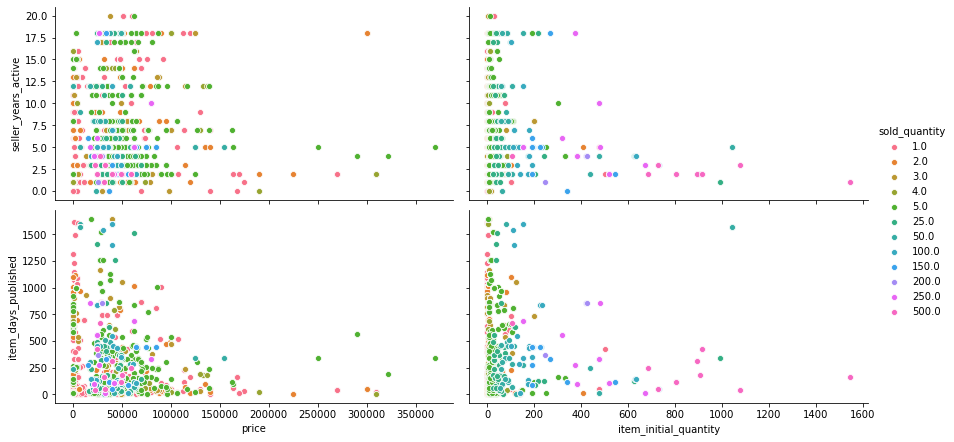

In [145]:
g = sns.pairplot(tv_df2, 
                 x_vars=["price", "item_initial_quantity"],
                 y_vars=["seller_years_active", "item_days_published"], hue="sold_quantity",
                height=3, aspect = 2)

**No hay relaciones lineales pero podemos ver claramente que indistintamente del tiempo que el vendedor esta activo, a medida 
que aumenta el precio o la cantidad inicial del item, hay franjas determinadas de la cantidad vendida**


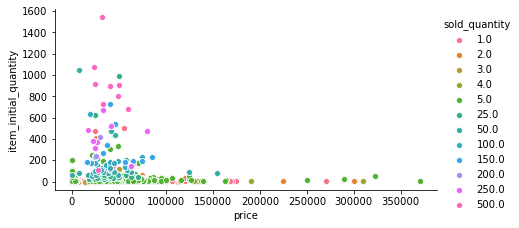

In [146]:
g = sns.pairplot(tv_df2, 
                 x_vars=["price"],
                 y_vars=["item_initial_quantity"], hue="sold_quantity",
                height=3, aspect = 2)

**A medida que aumenta la cantidad inicial del item, la variacion del precio se va acotando y va aumentando la cantidad vendida**


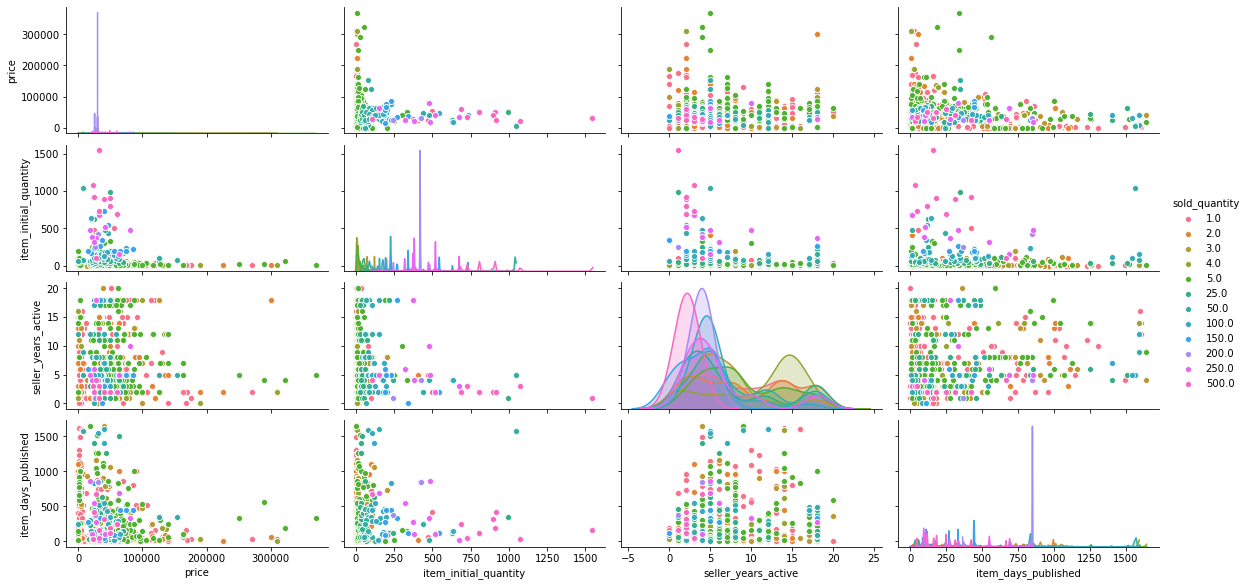

In [147]:
g = sns.pairplot(tv_df2, 
                 x_vars=["price", "item_initial_quantity", "seller_years_active", "item_days_published"],
                 y_vars=["price", "item_initial_quantity", "seller_years_active", "item_days_published"], 
                 hue="sold_quantity", diag_kws={'bw':1.5},
                height=2, aspect = 2)

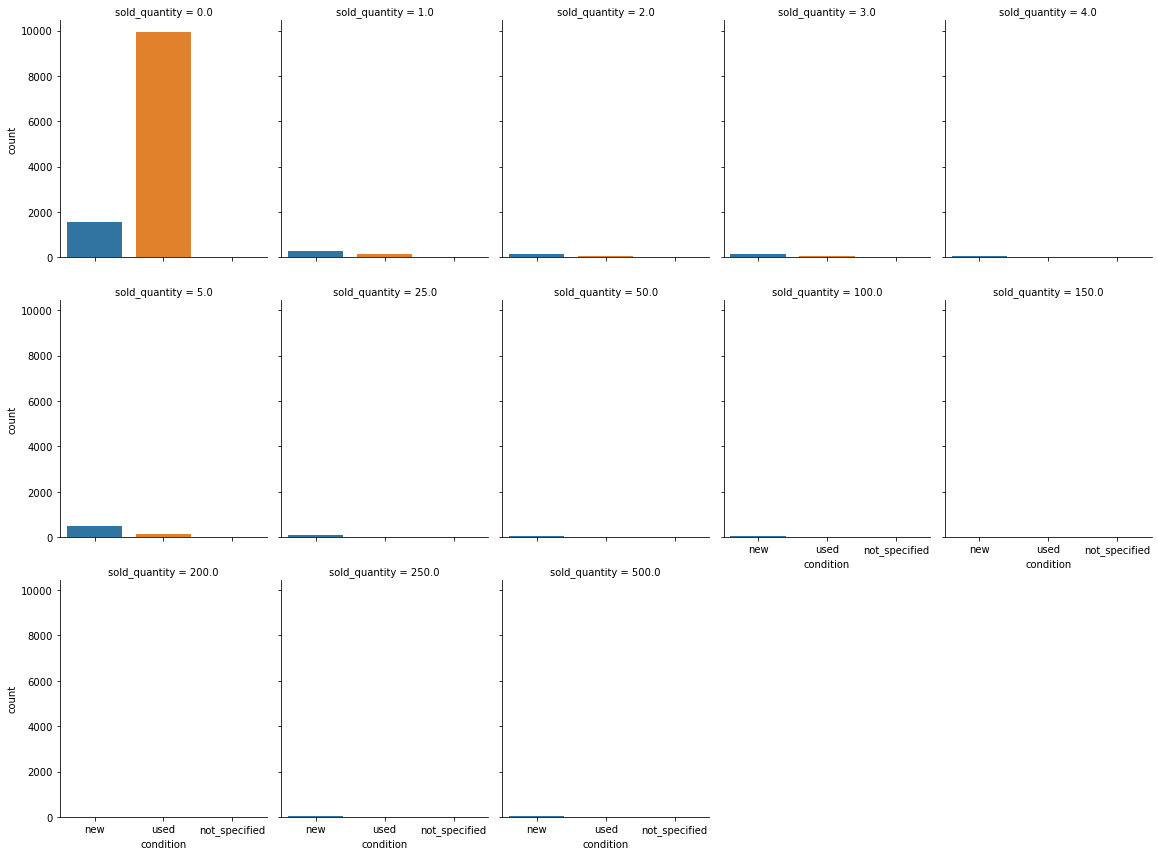

In [170]:
g = sns.catplot("condition", col="sold_quantity", col_wrap=5,
                data=tv_df[tv_df.condition.notnull()],
                kind="count", height=4, aspect=.8)

**Aca se ve claramente lo que se mencionaba respecto al grupo que tiene 0 items vendidos. Podemos ver una segregacion donde todos los articulos usados seguro venden 5 o menos unidades**

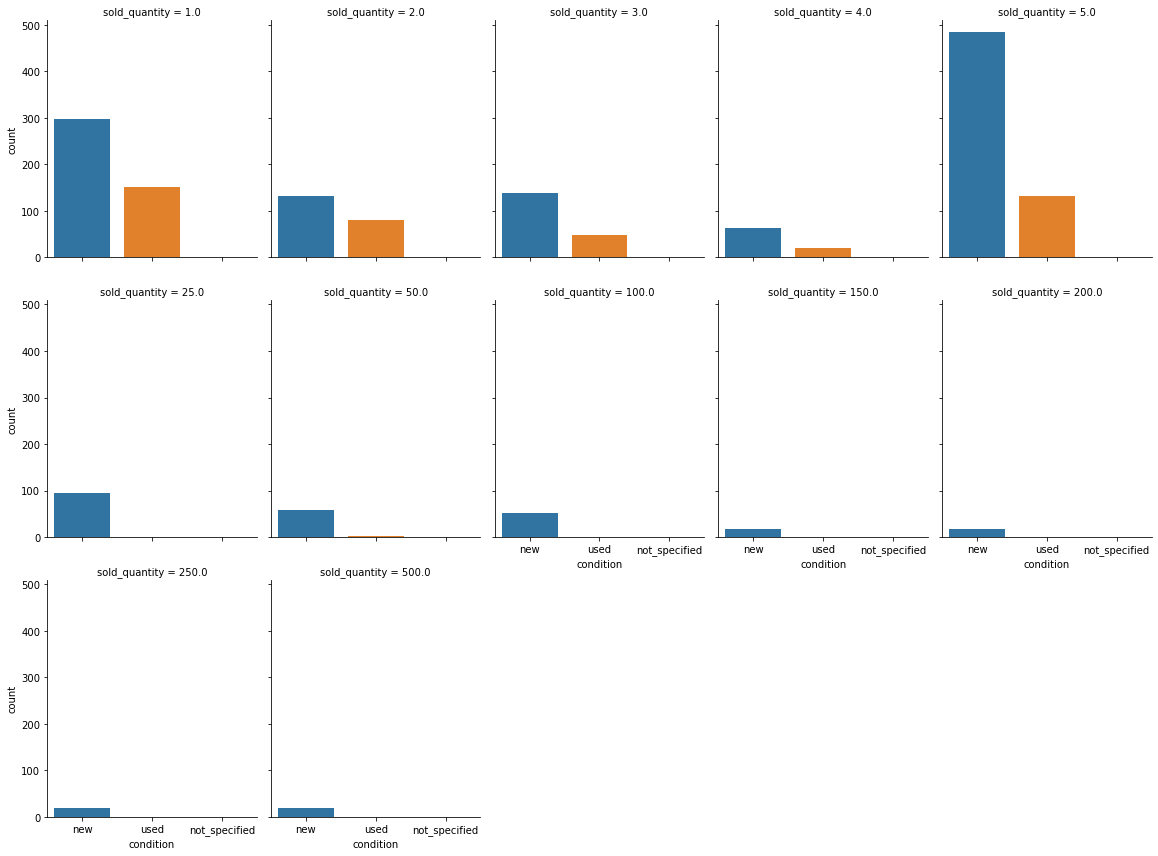

In [171]:
#sacamos el primner grupo
g = sns.catplot("condition", col="sold_quantity", col_wrap=5,
                data=tv_df2[tv_df2.condition.notnull()],
                kind="count", height=4, aspect=.8)

In [ ]:
eps=0.001 # 0 => 0.1¢
tv_df2['Log price'] = np.log(tv_df2['Amount']+eps)

In [164]:
tv_df2.describe()

available_quantity     discount  item_initial_quantity     latitude  \
count         1835.000000  1835.000000            1835.000000  1835.000000   
mean            24.089918     0.018448              66.535695   -34.133608   
std             73.161248     0.055344             164.730738     1.711720   
min              1.000000     0.000000               1.000000   -40.729290   
25%              1.000000     0.000000               5.000000   -34.656420   
50%              1.000000     0.000000              14.000000   -34.614160   
75%              1.000000     0.000000              48.000000   -34.558445   
max            500.000000     0.320074            1544.000000   -26.772388   

         longitude  n_attributes          price  \
count  1835.000000    1835.00000    1835.000000   
mean    -59.121245      27.79782   41053.986207   
std       1.899313      10.74519   42238.247309   
min     -68.872870       3.00000      22.000000   
25%     -58.581448      17.00000    9000.000000   
50%     -58.491200      29.00000   34999.000000   
75%     -58.398563      37.00000   53199.000000   
max     -57.541336      60.00000  369999.000000   

       seller.seller_reputation.metrics.cancellations.rate  \
count                                        1767.000000     
mean                                            0.012907     
std                                             0.035741     
min                                             0.000000     
25%                                             0.000000     
50%                                             0.003800     
75%                                             0.019750     
max                                             0.864800     

       seller.seller_reputation.metrics.cancellations.value  \
count                                        1767.000000      
mean                                           71.429542      
std                                           182.235143      
min                                             0.000000      
25%                                             0.000000      
50%                                            14.000000      
75%                                            48.000000      
max                                          2018.000000      

       seller.seller_reputation.metrics.claims.rate  ...  \
count                                   1767.000000  ...   
mean                                       0.019287  ...   
std                                        0.028612  ...   
min                                        0.000000  ...   
25%                                        0.007000  ...   
50%                                        0.015700  ...   
75%                                        0.025000  ...   
max                                        0.578900  ...   

       seller_months_active  seller_days_active  item_publication_year  \
count           1767.000000         1767.000000            1835.000000   
mean             103.223543         3155.890209            2018.801090   
std               62.731748         1910.475546               1.238777   
min                2.000000           82.000000            2016.000000   
25%               57.000000         1739.000000            2018.000000   
50%               87.000000         2670.000000            2019.000000   
75%              161.000000         4905.000000            2020.000000   
max              250.000000         7624.000000            2020.000000   

       item_publication_month  item_publication_day  item_years_published  \
count             1835.000000           1835.000000           1835.000000   
mean                 6.081199              6.081199              0.976022   
std                  2.690597              2.690597              1.161201   
min                  1.000000              1.000000              0.000000   
25%                  4.000000              4.000000              0.000000   
50%                  6.000000              6.00

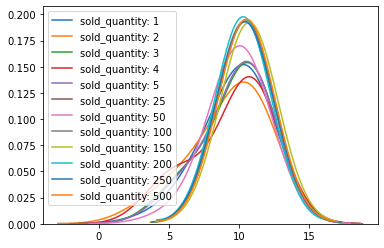

In [169]:
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 0]['Log price'], bw=2, label="sold_quantity: 0")
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 1]['Log price'], bw=2, label="sold_quantity: 1")
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 2]['Log price'], bw=2, label="sold_quantity: 2")
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 3]['Log price'], bw=2, label="sold_quantity: 3")
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 4]['Log price'], bw=2, label="sold_quantity: 4")
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 5]['Log price'], bw=2, label="sold_quantity: 5")

sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 25]['Log price'], bw=2, label="sold_quantity: 25")
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 50]['Log price'], bw=2, label="sold_quantity: 50")
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 100]['Log price'], bw=2, label="sold_quantity: 100")
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 150]['Log price'], bw=2, label="sold_quantity: 150")
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 200]['Log price'], bw=2, label="sold_quantity: 200")
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 250]['Log price'], bw=2, label="sold_quantity: 250")
sns.kdeplot(tv_df2[tv_df2['sold_quantity'] == 500]['Log price'], bw=2, label="sold_quantity: 500")

plt.legend();

## Precio por años publicado de un item

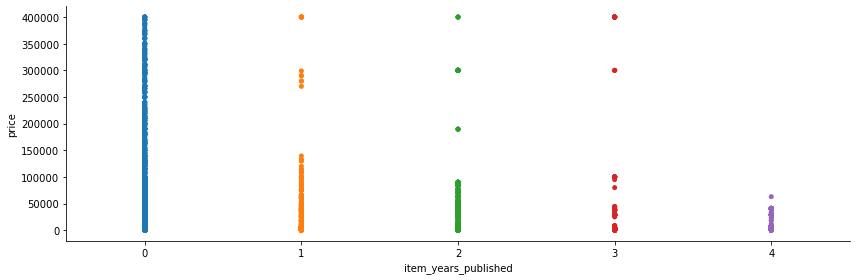

In [188]:
sns.catplot(x="item_years_published", y="price", jitter=False, data=tv_df, height=4, aspect = 3);

**A mas tiempo publicado un item, mas chico es el margen de precio**

## Sold Quantity / meses que pasa publicado un Item

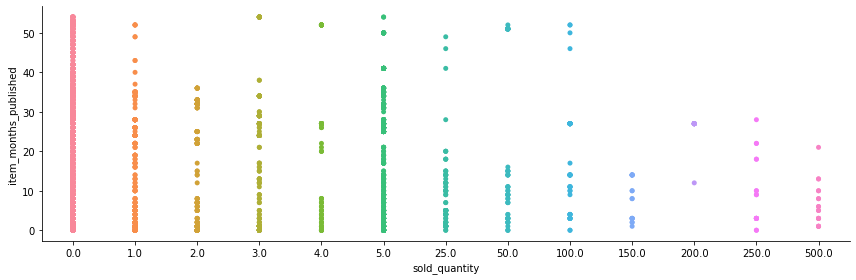

In [189]:

sns.catplot(x="sold_quantity", y="item_months_published", jitter=False, data=tv_df, height=4, aspect = 3);

**Los articulos que mas venden suelen estar menos meses publicados**

## Precio / Sold Quantity

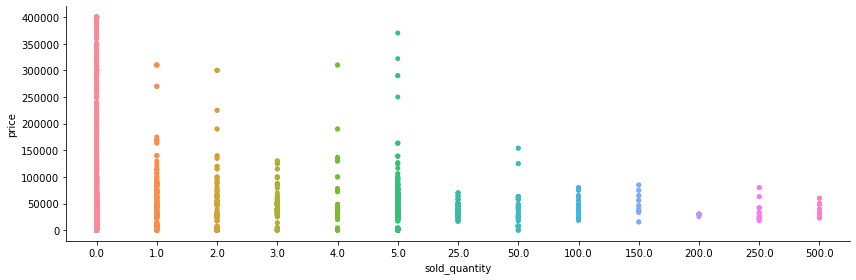

In [190]:
#para los que venden mayor cantidad de unidades, el precio es mas bajo
sns.catplot(x="sold_quantity", y="price", jitter=False, data=tv_df, height=4, aspect = 3);

**Los items que mas cantidaes venden tiene su precio mas acotado**

## Condition / Sold Quantity

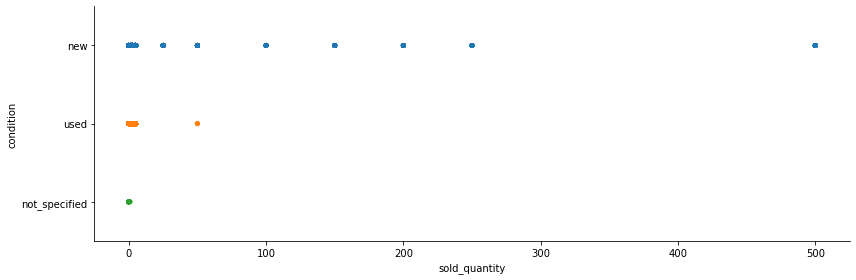

In [202]:
#podemos ver como si bien los articulos nuevos abarcan todo el rango, los prodcutos usados y no especificados 
#estan bien acotados para el sold quantity
sns.catplot(x="sold_quantity", y="condition", jitter=False, data=tv_df, height=4, aspect = 3);

**Se ve como si bien los articulos nuevos abarcan todo el rango, los prodcutos usados y no especificados 
estan bien acotados para el sold quantity**

## Power Seller Status / Sold Quantity

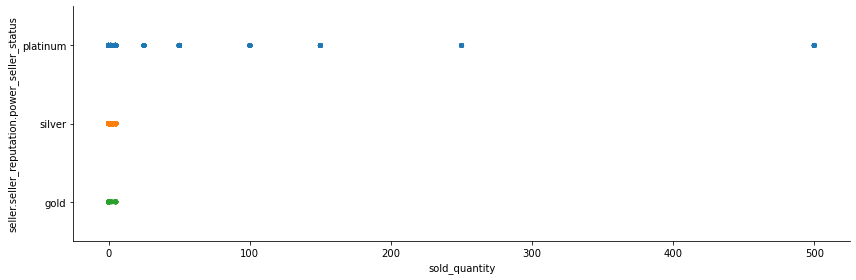

In [206]:

sns.catplot(x="sold_quantity", y="seller.seller_reputation.power_seller_status", jitter=False, data=tv_df, height=4, aspect = 3);

**Se observa como si bien los vendedores que son platinum venden en todos los rangos, los que son silver y gold estan acotados a menos de 50 unidades**

## Reputation Level / Sold Quantity

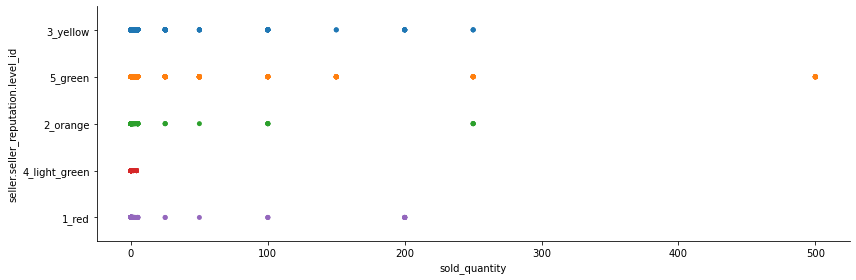

In [207]:
sns.catplot(x="sold_quantity", y="seller.seller_reputation.level_id", jitter=False, data=tv_df, height=4, aspect = 3);

**No parece haber un trend claro respecto a la reputacion del vendedor, salvo que los que son verde claro, seguro que no venden mas de 5 unidades**

## Shipping Mode / Sold Quantity

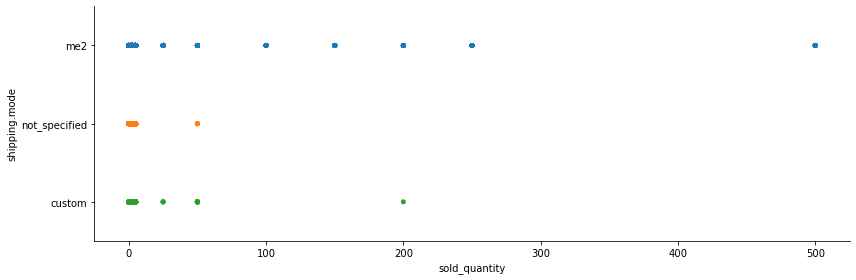

In [208]:

sns.catplot(x="sold_quantity", y="shipping.mode", jitter=False, data=tv_df, height=4, aspect = 3);

**Nuevamente hay una clara distintcion, el tipo de envio me2 parece separar aquellos que venden mas de 50 unidades del resto**

## Available / Sold Quantity

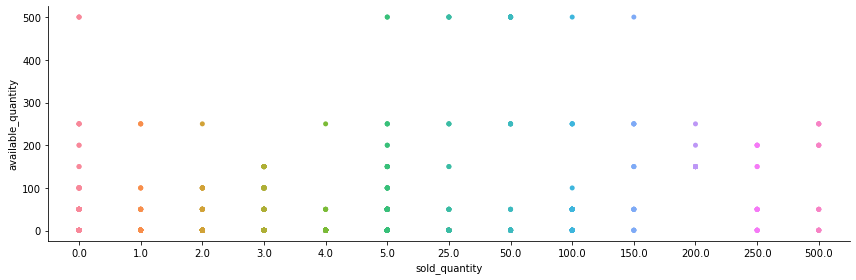

In [209]:

sns.catplot(x="sold_quantity", y="available_quantity", jitter=False, data=tv_df, height=4, aspect = 3);

**Aquellos items que poseen una mayor cantidad inicial, no parecen marcar una mayor tendencia de venta**

## Item Initial Quantity / Sold Quantity

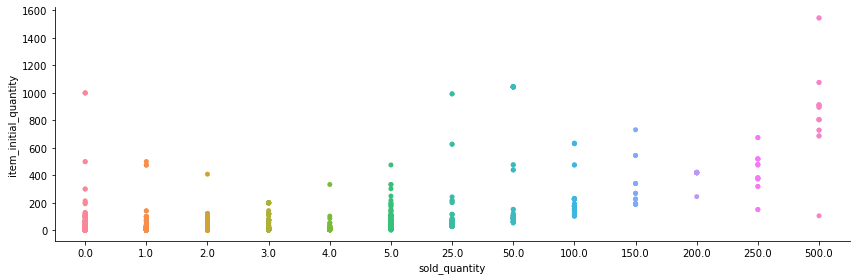

In [259]:

sns.catplot(x="sold_quantity", y="item_initial_quantity", jitter=False, data=tv_df, height=4, aspect = 3);

**Parece haber una correlacion lineal entre item_initial_quantity y el sold_quantity** 

## Display Type / Sold Quantity

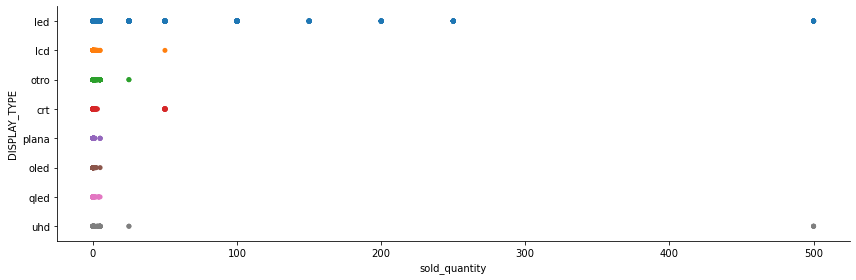

In [215]:

sns.catplot(x="sold_quantity", y="DISPLAY_TYPE", jitter=False, data=tv_df, height=4, aspect = 3);

**No parece haber una distincion en el tipo de pantalla, mas alla de los televisores led que dominan las cantidades vendidas superiores a 100**

## Display Size / Sold Quantity

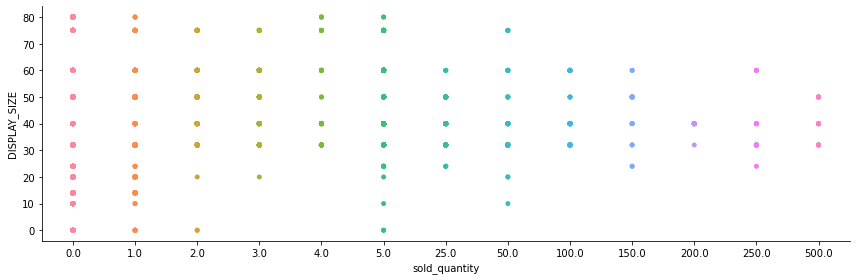

In [216]:

sns.catplot(x="sold_quantity", y="DISPLAY_SIZE", jitter=False, data=tv_df, height=4, aspect = 3);

**A medida que aumenta la cantidad vendidad, el display size esta mas acotado a los margenes medios entre 30 y 50 pulgadas**

## IS_SMART / SOLD QUANTITY

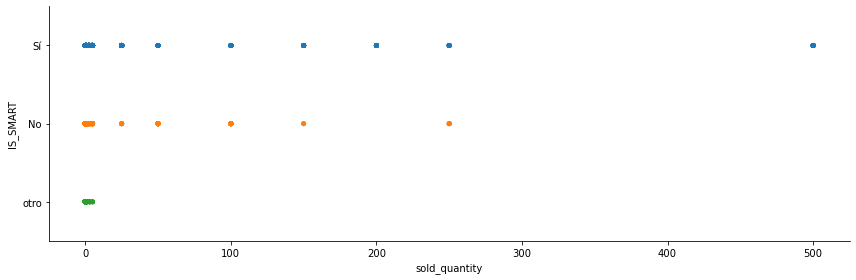

In [217]:
sns.catplot(x="sold_quantity", y="IS_SMART", jitter=False, data=tv_df, height=4, aspect = 3);

**Que sea Smart o no, no parecee ser determinante. Tambien puede ser que ya se haya convertido en una norma para los TVs** 

## RESOLUTION_TYPE / SOLD Quantity

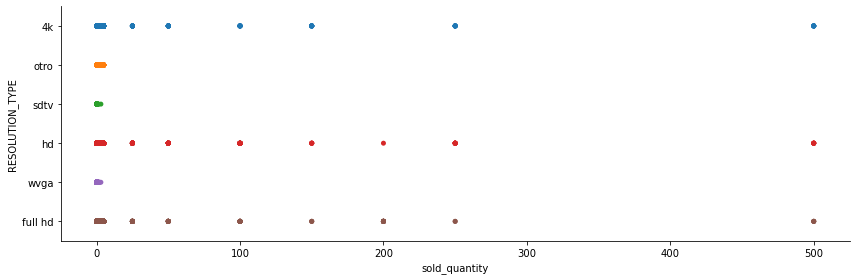

In [218]:

sns.catplot(x="sold_quantity", y="RESOLUTION_TYPE", jitter=False, data=tv_df, height=4, aspect = 3);

**La resolucion no es determinante. Las tecnologias actuales (HD, FULL HD y 4K) aparecen en todos los rangos**

## Sold Quantity / Brand

In [221]:
tv_df.brand.value_counts()[:17]

Philips       2412
LG            1902
Samsung       1412
Sony           812
Noblex         705
Hitachi        642
Philco         538
Sanyo          506
RCA            332
JVC            314
Admiral        277
Ken Brown      264
Top House      211
BGH            200
TCL            178
Telefunken     167
Hisense        147
Name: brand, dtype: int64

In [227]:
tv3 = tv_df.copy()
tv3 = tv3.reset_index(drop=True)
for indx in tv3.index:
    if tv3.at[indx, 'brand'] not in tv_df.brand.value_counts()[:17].keys():
        tv3.at[indx, 'brand'] = 'other'

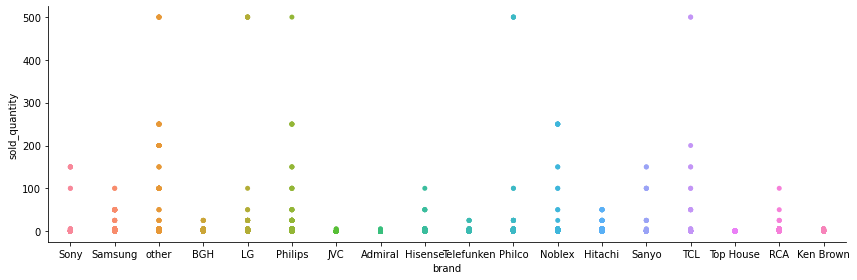

In [232]:
sns.catplot(x="brand", y="sold_quantity", jitter=False, data=tv3, height=4, aspect = 3);

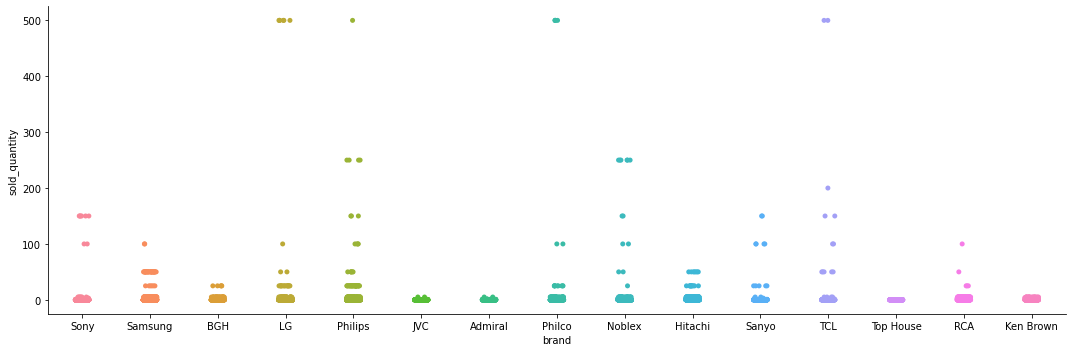

In [238]:
sns.catplot(x="brand", y="sold_quantity", data=tv_df[tv_df.brand.apply(lambda x: True if (x in tv_df.brand.value_counts()[:15].index.tolist()) else False)], height=5, aspect = 3);

**A simple vista no parece haber una marca dominante respecto a las cantidades vendidas, en las medidas menores a 150 unidades. Si se evidencian cuales son aquellas que venden mas de 250 unidades. Otra forma de verlos seria las ganancias producidas por cantidades vendidas*** 


In [ ]:
tv_df['earnings'] = tv_df['sold_quantity'] * tv_df['price']

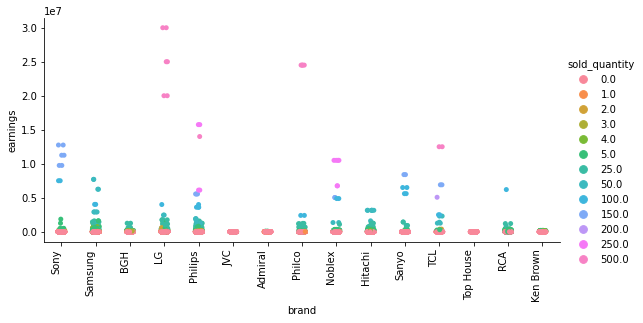

In [361]:
chart = sns.catplot(x="brand", y="earnings", hue="sold_quantity", 
                    data=tv_df[tv_df.brand.apply(lambda x: True if (x in tv_df.brand.value_counts()[:15].index.tolist()) else False)],
                   height=4, aspect = 2)
chart.set_xticklabels(rotation=90, horizontalalignment='right')

## Sold Quantity / Provincia

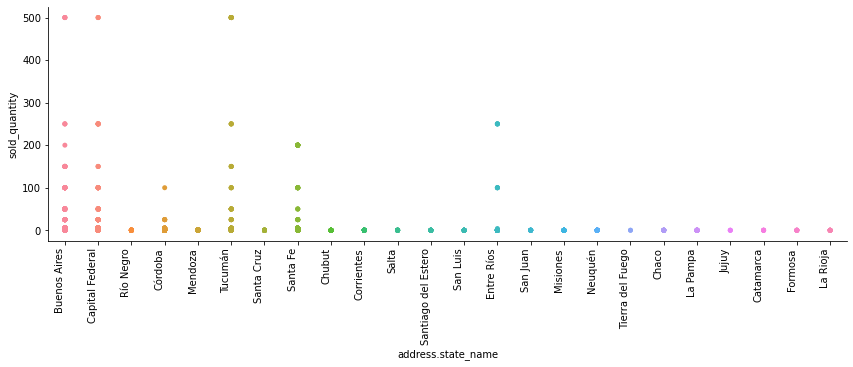

In [236]:

chart = sns.catplot(x="address.state_name", y="sold_quantity", jitter=False, data=tv3, height=4, aspect = 3);
chart.set_xticklabels(rotation=90, horizontalalignment='right')

**La oferta importante de televisores se concentra en unas pocas provincias**

# Features Principales

In [309]:
other_attribbutes = ['price', 'sold_quantity', 'seller.seller_reputation.transactions.total', 
          'seller.seller_reputation.transactions.canceled', 'seller.seller_reputation.transactions.ratings.negative', 
          'seller.seller_reputation.transactions.ratings.positive', 'seller.seller_reputation.transactions.ratings.neutral',
          'seller.seller_reputation.transactions.completed', 'seller.seller_reputation.metrics.claims.rate',
          'seller.seller_reputation.metrics.delayed_handling_time.rate', 'seller.seller_reputation.metrics.sales.completed',
          'seller.seller_reputation.metrics.cancellations.rate','seller_years_active', 'seller_months_active', 
          'seller_days_active', 'latitude', 'longitude', 'item_months_published', 'item_days_published', 'item_initial_quantity']

tv_df_hist = tv_df[other_attribbutes]

tv_df_hist = tv_df_hist.rename(columns={"seller.seller_reputation.transactions.total": "seller_transaction_tot", 
          "seller.seller_reputation.transactions.canceled": "seller_transactions_canceled", 
          'seller.seller_reputation.transactions.ratings.negative': 'seller_reputation_neg', 
          'seller.seller_reputation.transactions.ratings.positive': 'seller_reputation_pos' , 
          'seller.seller_reputation.transactions.ratings.neutral' : 'seller_reputation_neu',
          'seller.seller_reputation.transactions.completed': 'seller_transactions_completed', 
          'seller.seller_reputation.metrics.claims.rate': 'seller_claims_rate',
          'seller.seller_reputation.metrics.delayed_handling_time.rate': 'seller_delayed_handling_time_rate',
          'seller.seller_reputation.metrics.sales.completed' : 'seller_sales_completed' ,
          'seller.seller_reputation.metrics.cancellations.rate': 'seller_cancellations_rate'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E145700B8>,
      dtype=object)

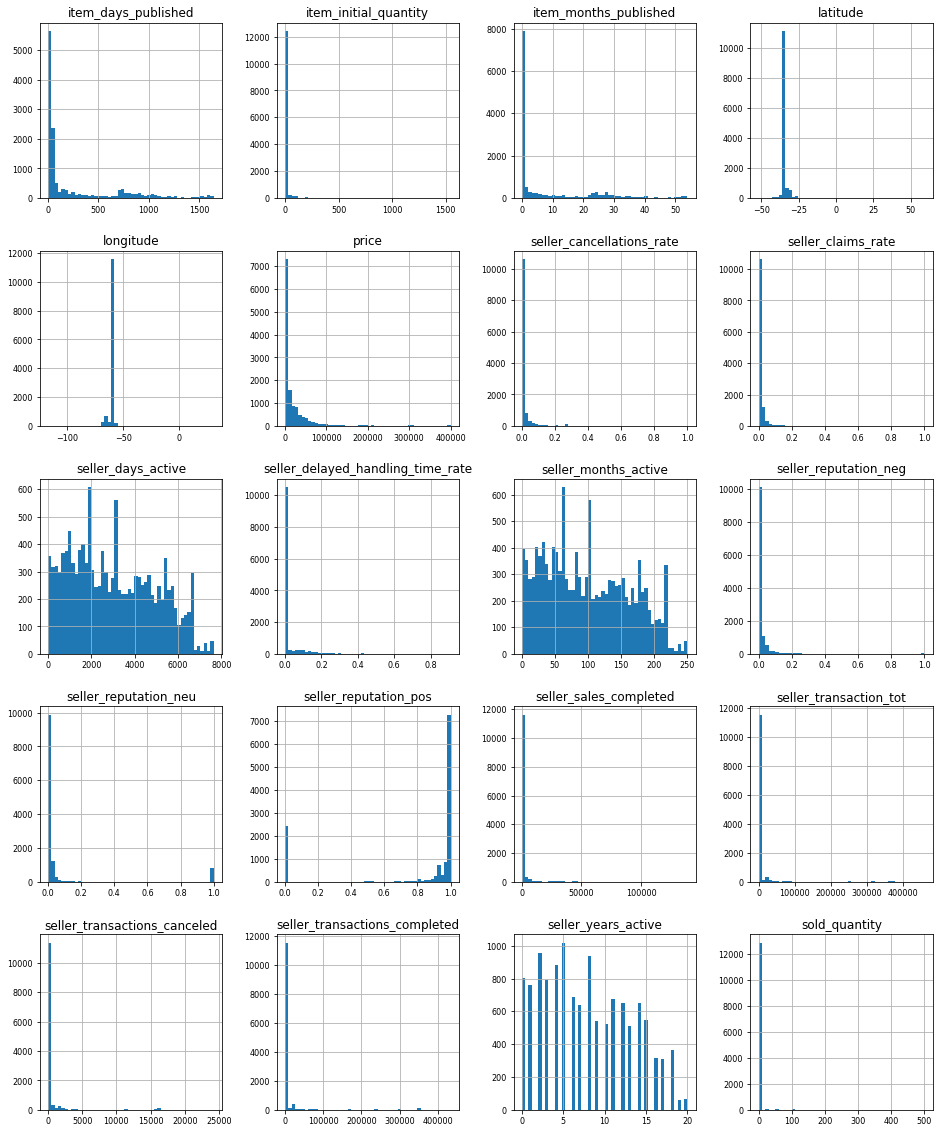

In [308]:
tv_df_hist.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

## Correlaciones Lineales

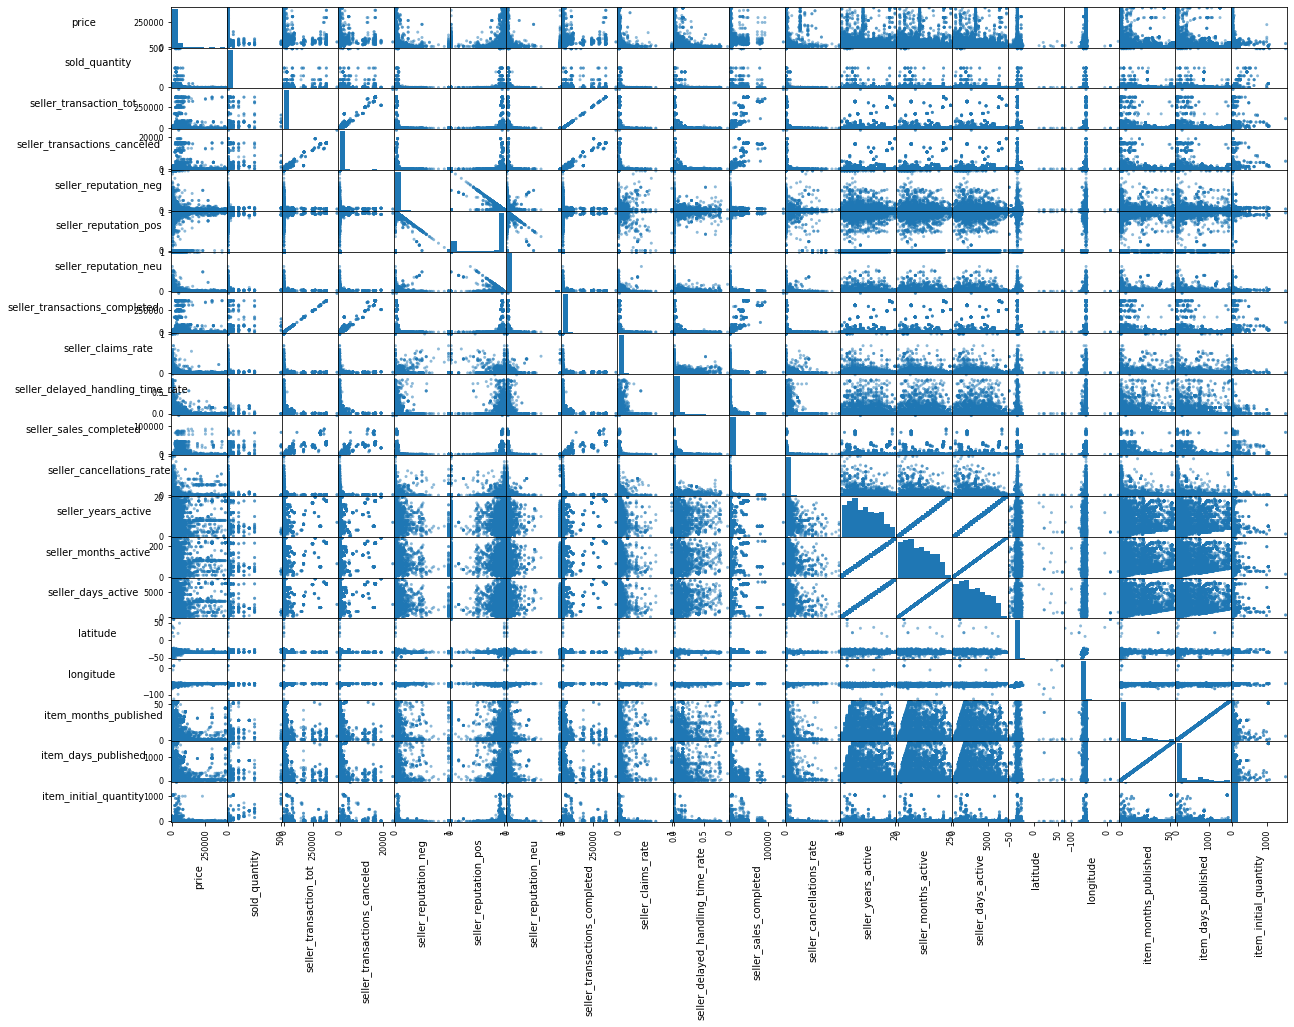

In [284]:
from pandas.plotting import scatter_matrix
#attributes = ['sold_quantity', 'seller.seller_reputation.metrics.claims.excluded.real_value', 'available_quantity', 'seller.seller_reputation.metrics.sales.completed', 'seller.seller_reputation.transactions.ratings.negative']
axs = scatter_matrix(tv_df_hist, figsize=(20,15))
n = len(tv_df_hist.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

**obviamente existen correlaciones entre familias de kpi, como el seller reputation negative, neutral y  positive, el seller transaction completed con el transaction total y el transaction cancelled. Se observa la correlacion entre el seller reputation negative y el claim rate y la posible correlacion lineal entre el Sold_quantity y el Item Initial Quantity**

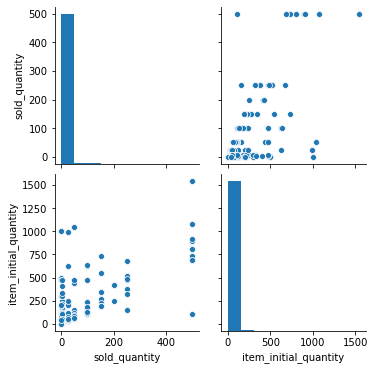

In [286]:
g = sns.pairplot(tv_df_hist, vars=["sold_quantity", "item_initial_quantity"])

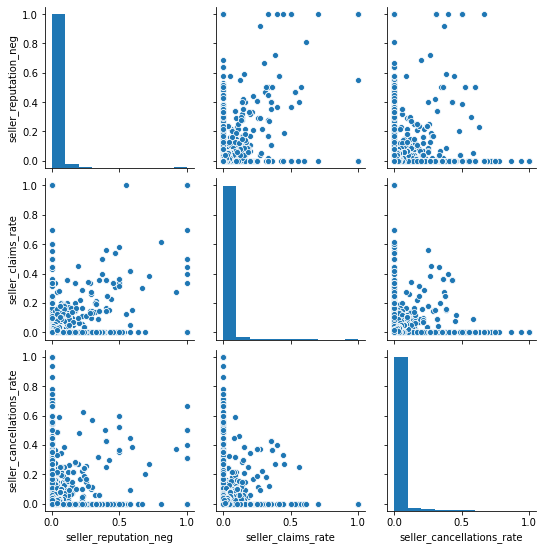

In [287]:
g = sns.pairplot(tv_df_hist, vars=["seller_reputation_neg", "seller_claims_rate", 'seller_cancellations_rate'])

In [288]:
df_num_corr = tv_df_hist.corr()['sold_quantity']

In [289]:
golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print("Correlated values with sold_quantity", golden_features_list)

Correlated values with sold_quantity sold_quantity                        1.000000
item_initial_quantity                0.691945
seller_sales_completed               0.281494
seller_transactions_canceled         0.196660
seller_transaction_tot               0.191696
seller_transactions_completed        0.191287
latitude                             0.079106
seller_reputation_pos                0.046104
item_days_published                  0.043455
item_months_published                0.042850
price                                0.031246
seller_reputation_neg                0.016910
seller_claims_rate                   0.012695
seller_delayed_handling_time_rate    0.001961
seller_cancellations_rate           -0.010548
seller_reputation_neu               -0.021928
seller_months_active                -0.054294
seller_days_active                  -0.054340
seller_years_active                 -0.056008
longitude                           -0.056926
Name: sold_quantity, dtype: float64


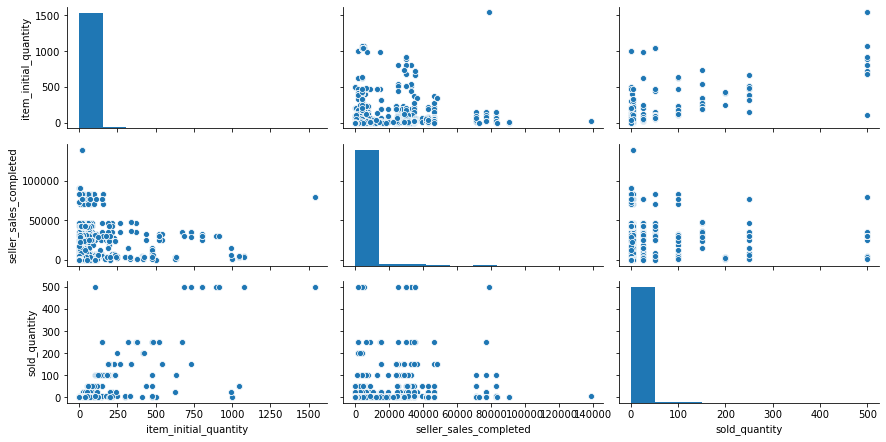

In [290]:
g = sns.pairplot(tv_df_hist, 
                 x_vars=["item_initial_quantity", "seller_sales_completed", "sold_quantity" ],
                 y_vars=["item_initial_quantity", "seller_sales_completed", "sold_quantity"], 
                 height=2, aspect = 2)

### Ahora vamos a volver a visualizar lo mismo sacando el grupo de Sold Quantity = 0 que metia demasiado ruido deebido a los items usados

In [291]:
other_attribbutes = ['price', 'sold_quantity', 'seller.seller_reputation.transactions.total', 
          'seller.seller_reputation.transactions.canceled', 'seller.seller_reputation.transactions.ratings.negative', 
          'seller.seller_reputation.transactions.ratings.positive', 'seller.seller_reputation.transactions.ratings.neutral',
          'seller.seller_reputation.transactions.completed', 'seller.seller_reputation.metrics.claims.rate',
          'seller.seller_reputation.metrics.delayed_handling_time.rate', 'seller.seller_reputation.metrics.sales.completed',
          'seller.seller_reputation.metrics.cancellations.rate','seller_years_active', 'seller_months_active', 
          'seller_days_active', 'latitude', 'longitude', 'item_months_published', 'item_days_published', 'item_initial_quantity']

tv_df_hist_noOutliers = tv_df2[other_attribbutes]

tv_df_hist_noOutliers = tv_df_hist_noOutliers.rename(columns={"seller.seller_reputation.transactions.total": "seller_transaction_tot", 
          "seller.seller_reputation.transactions.canceled": "seller_transactions_canceled", 
          'seller.seller_reputation.transactions.ratings.negative': 'seller_reputation_neg', 
          'seller.seller_reputation.transactions.ratings.positive': 'seller_reputation_pos' , 
          'seller.seller_reputation.transactions.ratings.neutral' : 'seller_reputation_neu',
          'seller.seller_reputation.transactions.completed': 'seller_transactions_completed', 
          'seller.seller_reputation.metrics.claims.rate': 'seller_claims_rate',
          'seller.seller_reputation.metrics.delayed_handling_time.rate': 'seller_delayed_handling_time_rate',
          'seller.seller_reputation.metrics.sales.completed' : 'seller_sales_completed' ,
          'seller.seller_reputation.metrics.cancellations.rate': 'seller_cancellations_rate'})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E26DF7470>,
      dtype=object)

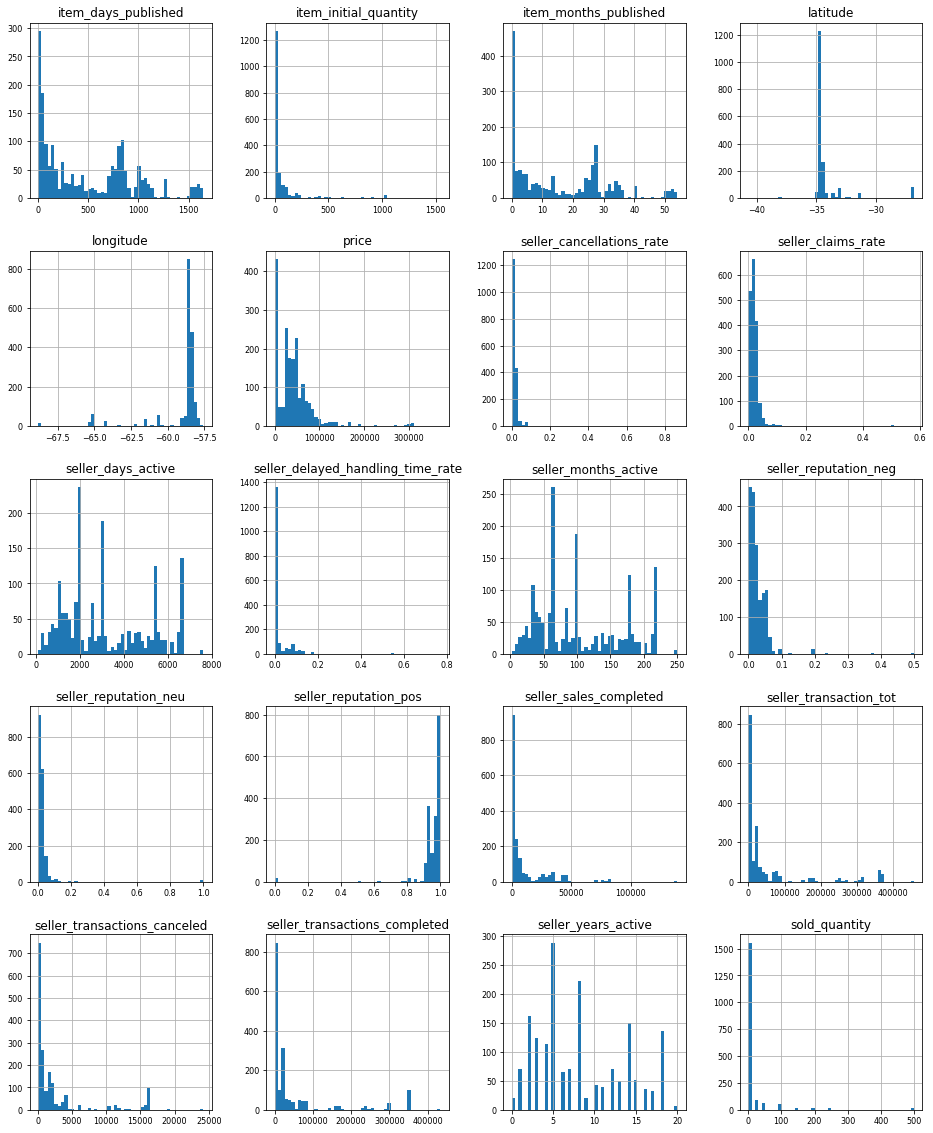

In [292]:
tv_df_hist_noOutliers.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

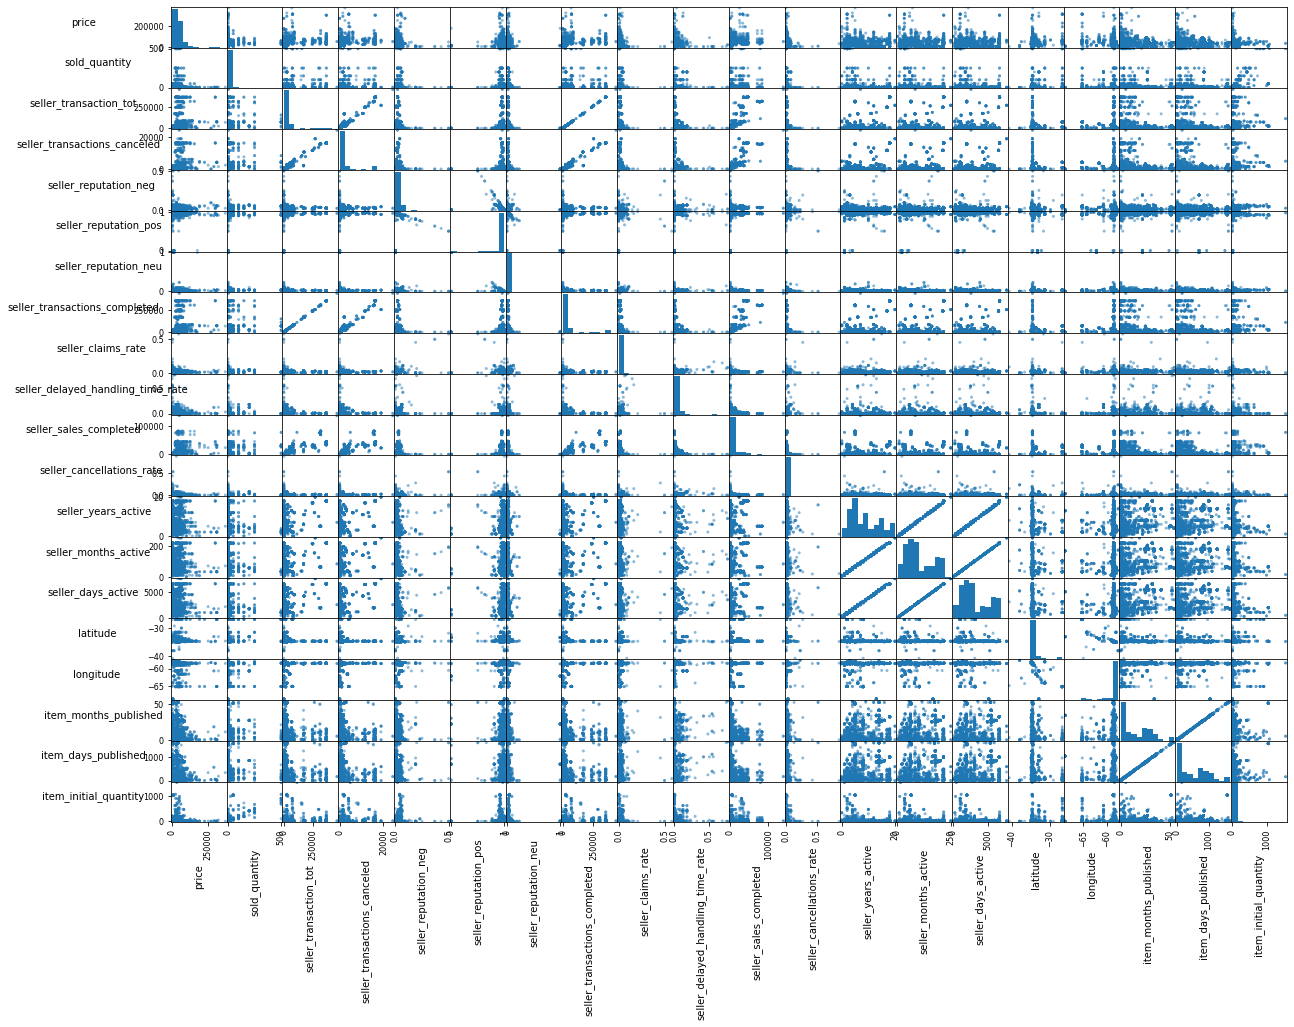

In [293]:
from pandas.plotting import scatter_matrix
#attributes = ['sold_quantity', 'seller.seller_reputation.metrics.claims.excluded.real_value', 'available_quantity', 'seller.seller_reputation.metrics.sales.completed', 'seller.seller_reputation.transactions.ratings.negative']
axs = scatter_matrix(tv_df_hist_noOutliers, figsize=(20,15))
n = len(tv_df_hist_noOutliers.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = axs[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

In [294]:
df_num_corr = tv_df_hist_noOutliers.corr()['sold_quantity']
golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print("Correlated values with sold_quantity", golden_features_list)

Correlated values with sold_quantity sold_quantity                        1.000000
item_initial_quantity                0.692805
latitude                             0.327096
seller_sales_completed               0.220691
seller_reputation_neg                0.113092
seller_transactions_canceled         0.113058
seller_transaction_tot               0.111575
seller_transactions_completed        0.111391
seller_delayed_handling_time_rate    0.026811
seller_reputation_neu                0.013219
seller_claims_rate                  -0.005191
seller_cancellations_rate           -0.010248
price                               -0.019303
seller_reputation_pos               -0.044824
item_days_published                 -0.045564
item_months_published               -0.046556
seller_days_active                  -0.176615
seller_months_active                -0.176687
seller_years_active                 -0.180159
longitude                           -0.218812
Name: sold_quantity, dtype: float64


### Al sacar el grupo del sold Quantity 0, vemos que aparece una nueva correlacion con la latitud que antes no habiamos visto

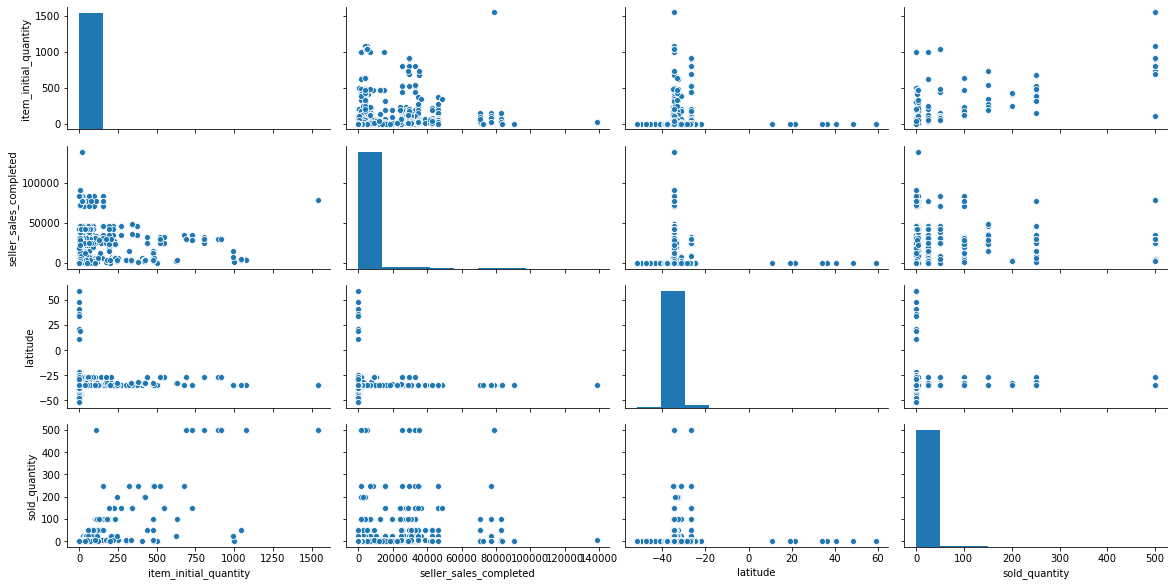

In [296]:
g = sns.pairplot(tv_df_hist, 
                 x_vars=["item_initial_quantity", "seller_sales_completed", "latitude", "sold_quantity" ],
                 y_vars=["item_initial_quantity", "seller_sales_completed", "latitude", "sold_quantity"], 
                 height=2, aspect = 2)

## Correlaciones No Lineales


In [297]:
df_num_corr_nonlinear = tv_df_hist.corr(method ='spearman')['sold_quantity']

### Contemplando el grupo Sold Quantity = 0

In [299]:
golden_features_list = df_num_corr_nonlinear[abs(df_num_corr_nonlinear) > 0].sort_values(ascending=False)
print("Correlated values with sold_quantity", golden_features_list)

Correlated values with sold_quantity sold_quantity                        1.000000
item_initial_quantity                0.754552
seller_transactions_completed        0.514768
seller_transaction_tot               0.514640
seller_sales_completed               0.512864
seller_transactions_canceled         0.506562
seller_claims_rate                   0.439920
seller_reputation_neg                0.385688
seller_cancellations_rate            0.297661
item_months_published                0.279414
item_days_published                  0.269724
price                                0.259788
seller_reputation_neu                0.253122
seller_delayed_handling_time_rate    0.230591
seller_months_active                 0.028085
seller_days_active                   0.027927
seller_years_active                  0.026788
longitude                            0.005574
latitude                            -0.010166
seller_reputation_pos               -0.064168
Name: sold_quantity, dtype: float64


**Parecen haber fuertes correlaciones no lineales**

### Sin Contemplar el grupo Sold Quantity = 0

In [301]:
df_num_corr_nonlinear = tv_df_hist_noOutliers.corr(method ='spearman')['sold_quantity']

golden_features_list = df_num_corr_nonlinear[abs(df_num_corr_nonlinear) > 0].sort_values(ascending=False)
print("Correlated values with sold_quantity", golden_features_list)

Correlated values with sold_quantity sold_quantity                        1.000000
item_initial_quantity                0.698092
seller_transactions_completed        0.399866
seller_transaction_tot               0.394250
seller_sales_completed               0.393111
seller_transactions_canceled         0.358673
seller_reputation_neu                0.206025
seller_reputation_neg                0.182033
seller_claims_rate                   0.149503
latitude                             0.128681
item_days_published                  0.126873
item_months_published                0.125268
seller_cancellations_rate            0.062695
seller_delayed_handling_time_rate    0.044592
price                                0.009527
longitude                           -0.067369
seller_years_active                 -0.083786
seller_months_active                -0.084017
seller_days_active                  -0.084479
seller_reputation_pos               -0.137136
Name: sold_quantity, dtype: float64


**Se siguen marcando las correlaciones no lineales pero estas no son tan fuertes**

## Feature to Feature Relationship

**Vamos a ver cuales son las correlaciones lineales entre los features numericos, por fuera del sold quantity, para empezar a descartar features que ya esten explicados por algun otro y asi poder reducir mi entrada al modelo**

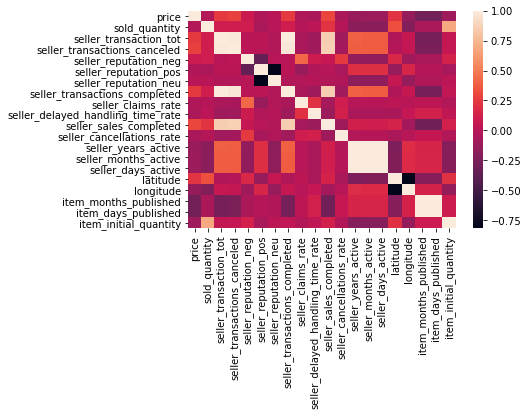

In [303]:
corr = tv_df_hist_noOutliers.corr()
sns.heatmap(corr)

Removemos uno de los features que tienen alta correlacion lineal

In [305]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = tv_df_hist_noOutliers.columns[columns]


este seria mi primer set de features. mi punto de partida. Despues, en base a las correlaciones con sold_quantity, puedo seguir filtrandolos

In [306]:
selected_columns

Index(['price', 'sold_quantity', 'seller_transaction_tot',
       'seller_reputation_neg', 'seller_reputation_pos',
       'seller_reputation_neu', 'seller_claims_rate',
       'seller_delayed_handling_time_rate', 'seller_sales_completed',
       'seller_cancellations_rate', 'seller_years_active', 'latitude',
       'longitude', 'item_months_published', 'item_initial_quantity'],
      dtype='object')